In [29]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [31]:
ngo = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')
ngo.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [32]:
word = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv")
word.head()

Column Name  \
0     country   
1  child_mort   
2     exports   
3      health   
4     imports   

                                                                     Description  
0                                                            Name of the country  
1                    Death of children under 5 years of age per 1000 live births  
2  Exports of goods and services per capita. Given as %age of the GDP per capita  
3              Total health spending per capita. Given as %age of GDP per capita  
4  Imports of goods and services per capita. Given as %age of the GDP per capita

In [33]:
ngo.shape

(167, 10)

In [34]:
ngo_dub = ngo.copy()

# Checking for duplicates and dropping the entire duplicate row if any
ngo_dub.drop_duplicates(subset=None, inplace=True)

In [35]:
ngo_dub.shape

(167, 10)

No duplicates are there

In [36]:
ngo.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [37]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [38]:
# NULL Percentage : Columns

ngo.isnull().sum().value_counts(ascending=False)

0    10
Name: count, dtype: int64

In [39]:
# NULL Percentage : Rows

ngo.isnull().sum(axis=1).value_counts(ascending=False)

0    167
Name: count, dtype: int64

There are no null or missing values in the dataset.

In [40]:
# Since percentage of exports do not give a clear idea , as compared to the amount of export

ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100
     

In [19]:
ProfileReport(df, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [41]:
ngo.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

UniVariate Analysis

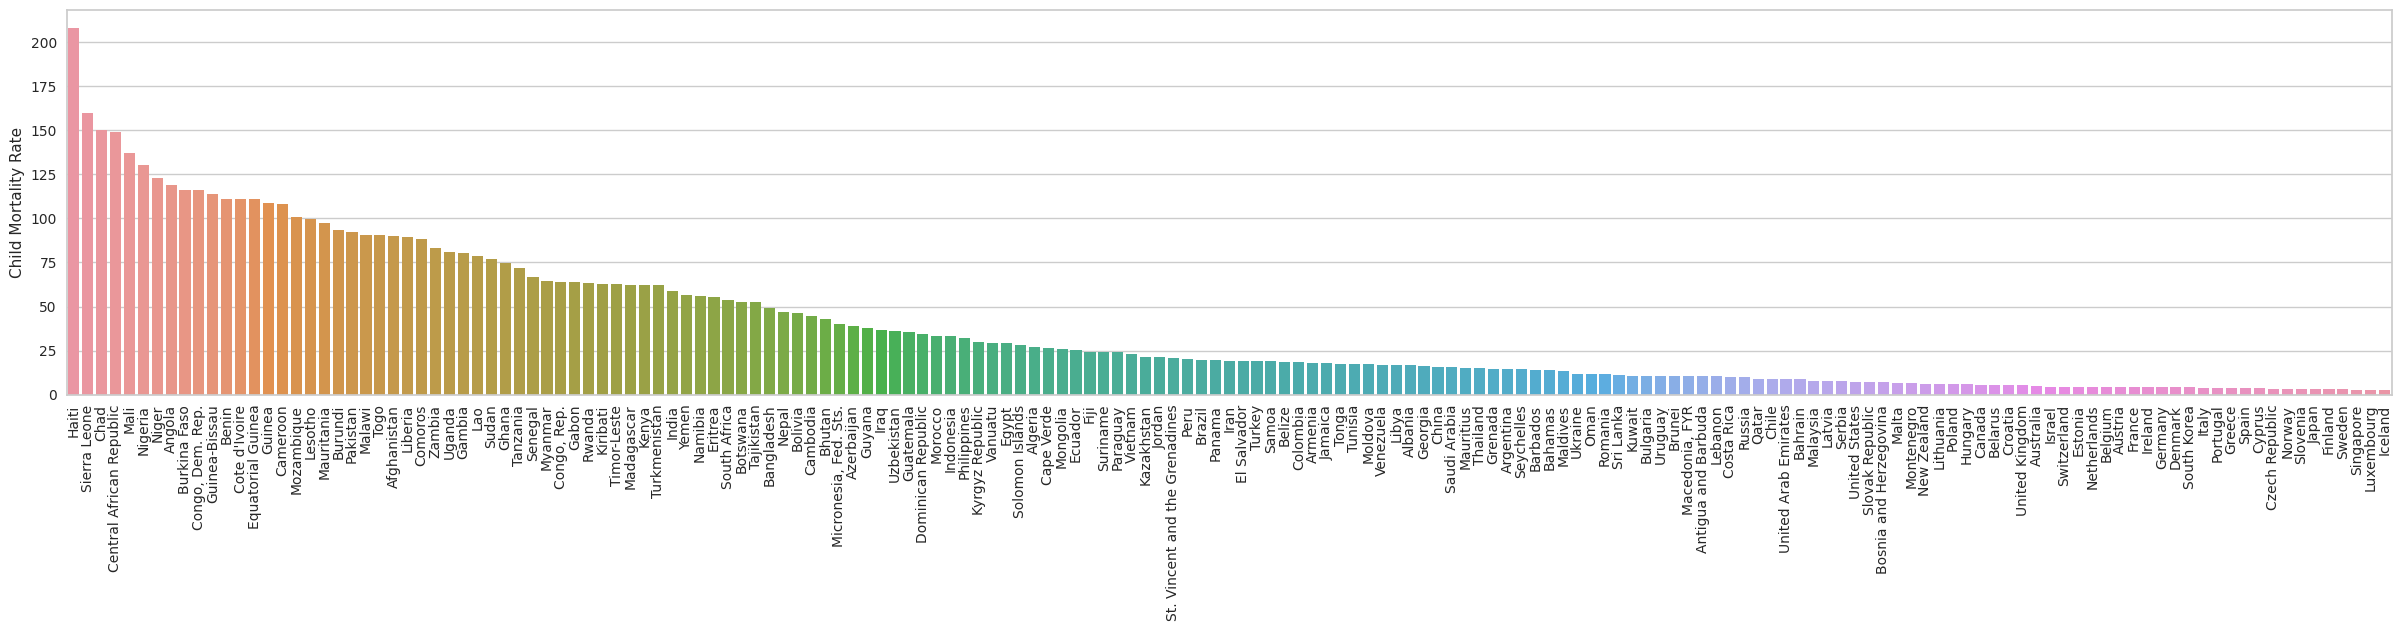

In [42]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

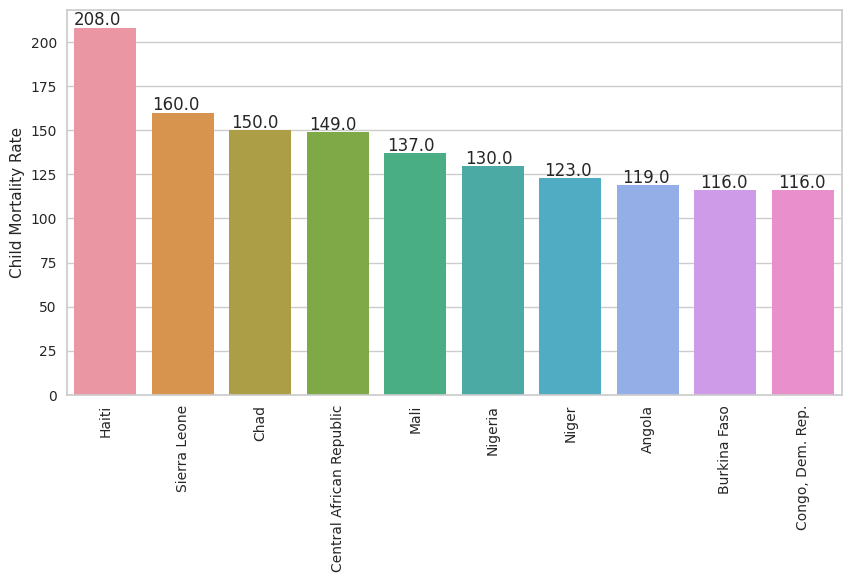

In [43]:
plt.figure(figsize = (10,5))
child_mort_top10 = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

Most of the countries are of Africa due to poor healthcare facilities

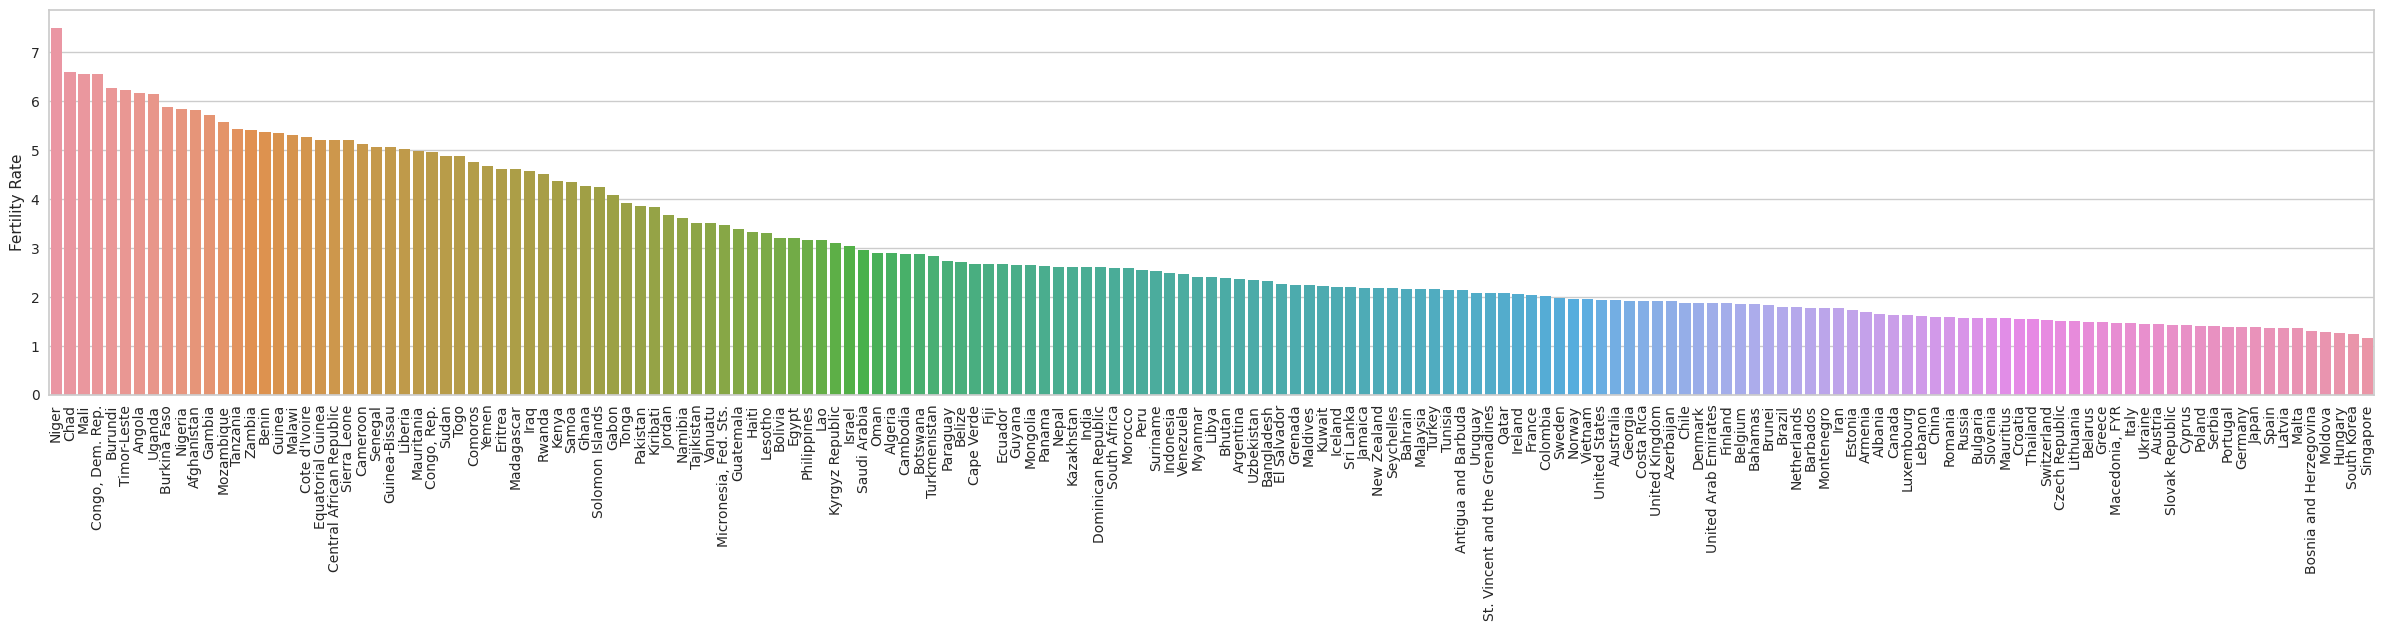

In [45]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

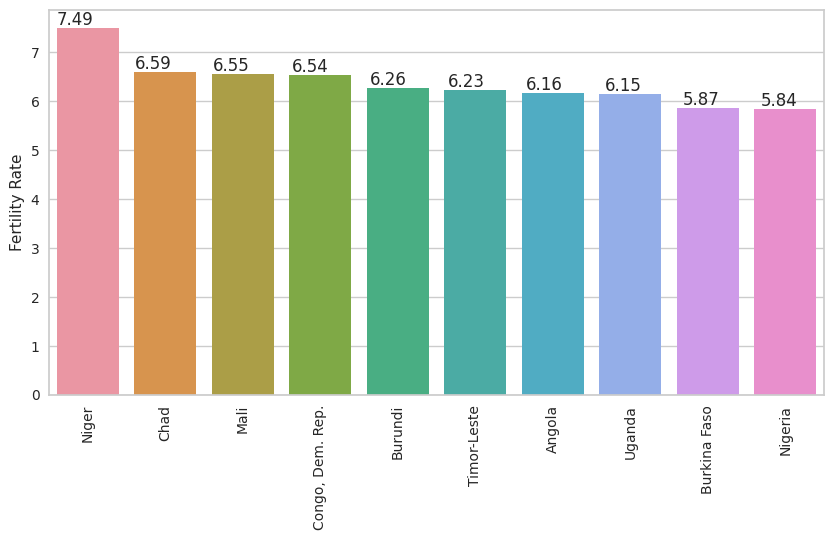

In [46]:
plt.figure(figsize = (10,5))
total_fer_top10 = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

fertility rates are higher due to the lack of access to contraceptives and generally lower levels of female education.

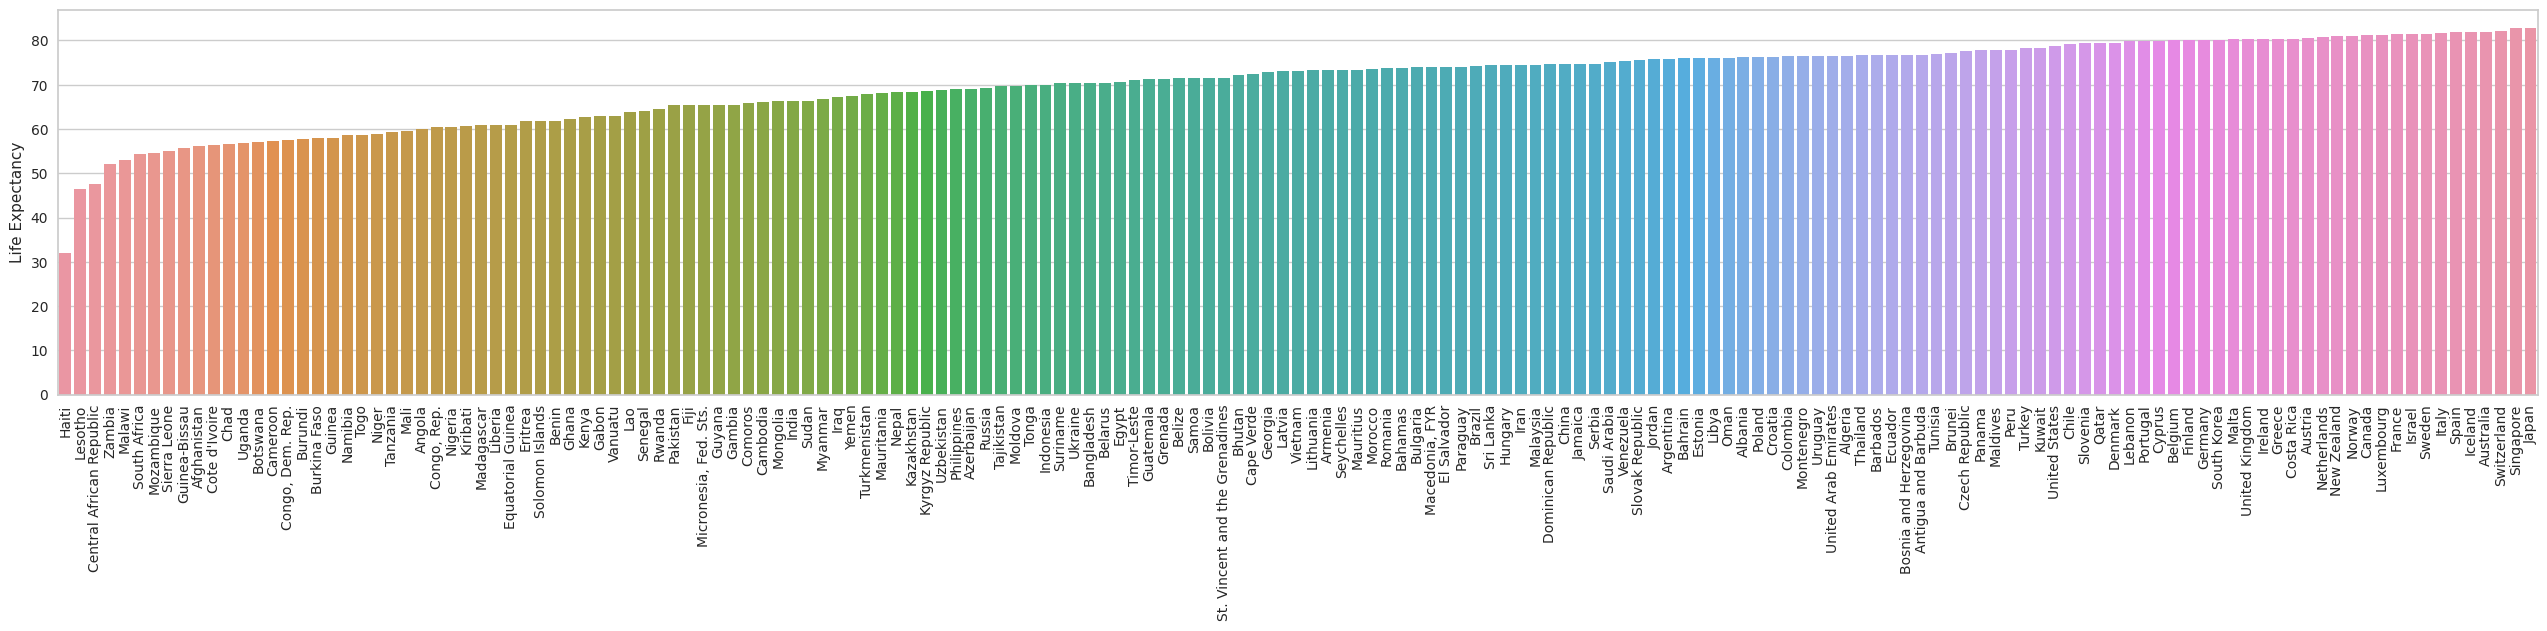

In [47]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

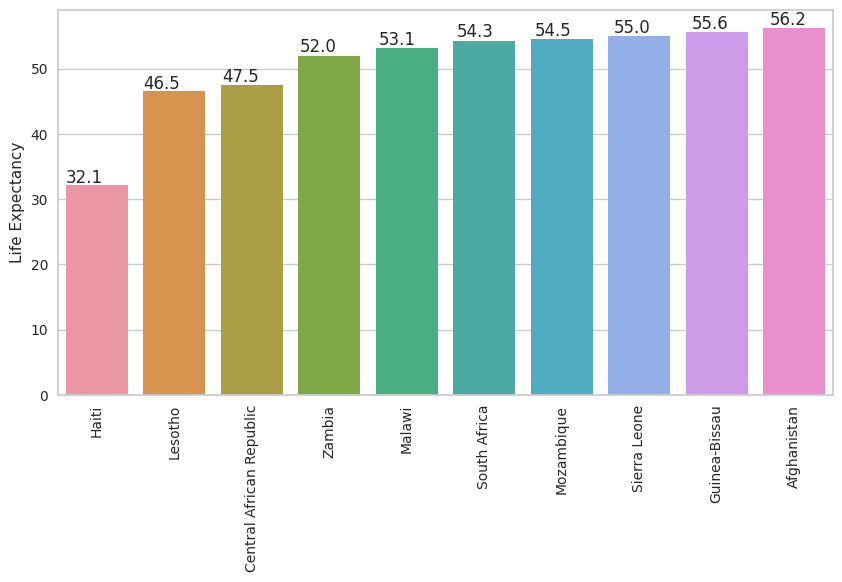

In [48]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Life expectancy is lower due to poverty , poor healthcare and poor hygiene

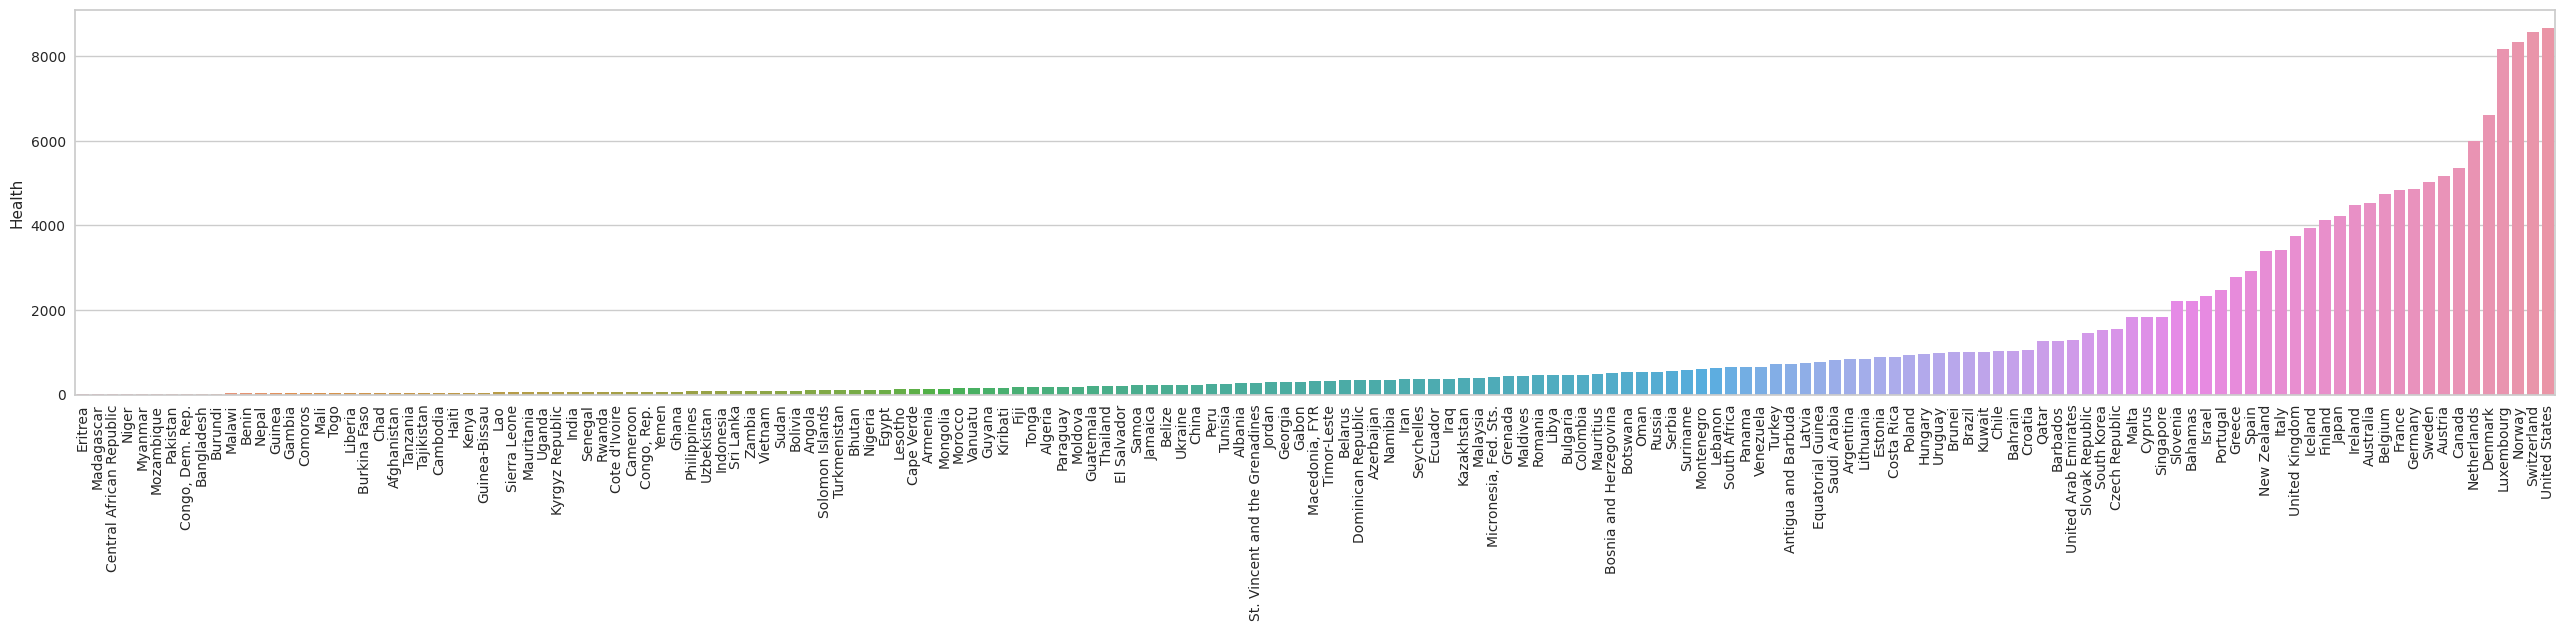

In [49]:
# Health :Total health spending .
plt.figure(figsize = (32,5))
health = ngo[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

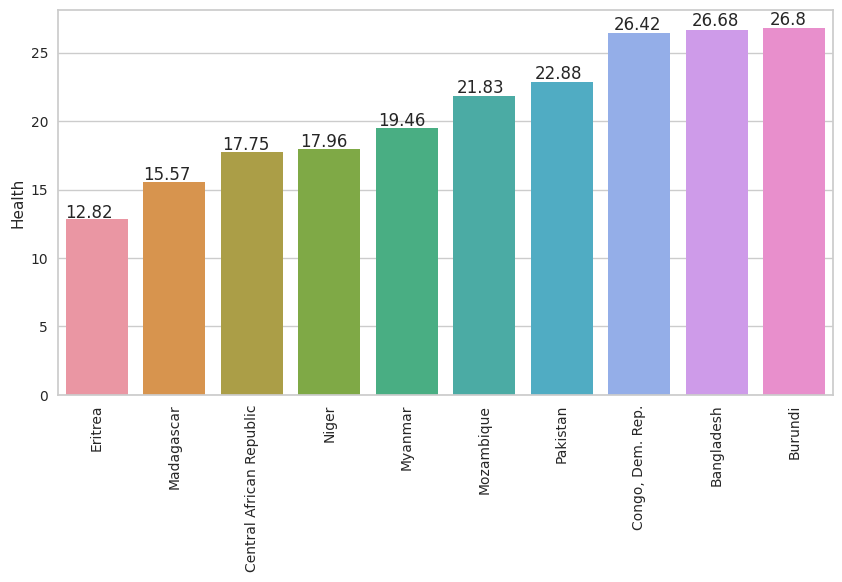

In [50]:
plt.figure(figsize = (10,5))
health_bottom10 = ngo[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

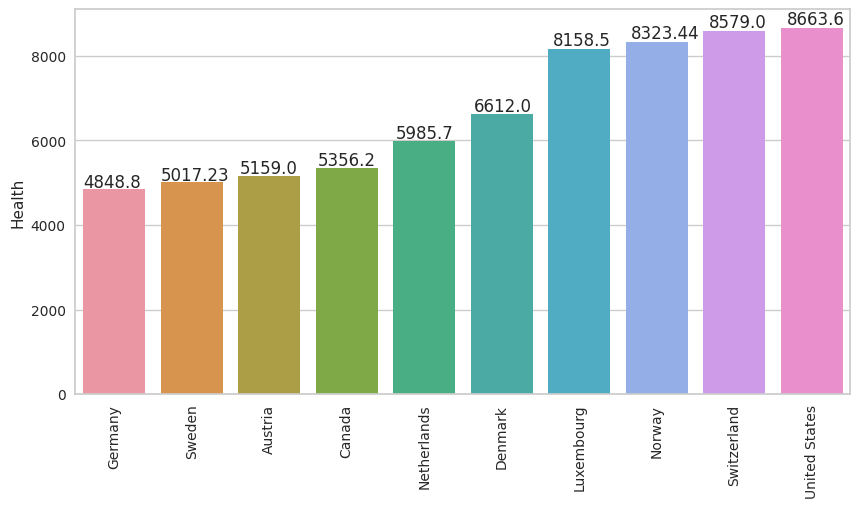

In [51]:

plt.figure(figsize = (10,5))
health_top10 = ngo[['country','health']].sort_values('health', ascending = True).tail(10)
ax = sns.barplot(x='country', y='health', data= health_top10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

Developed countries spend a large amount of their gdp in health sector

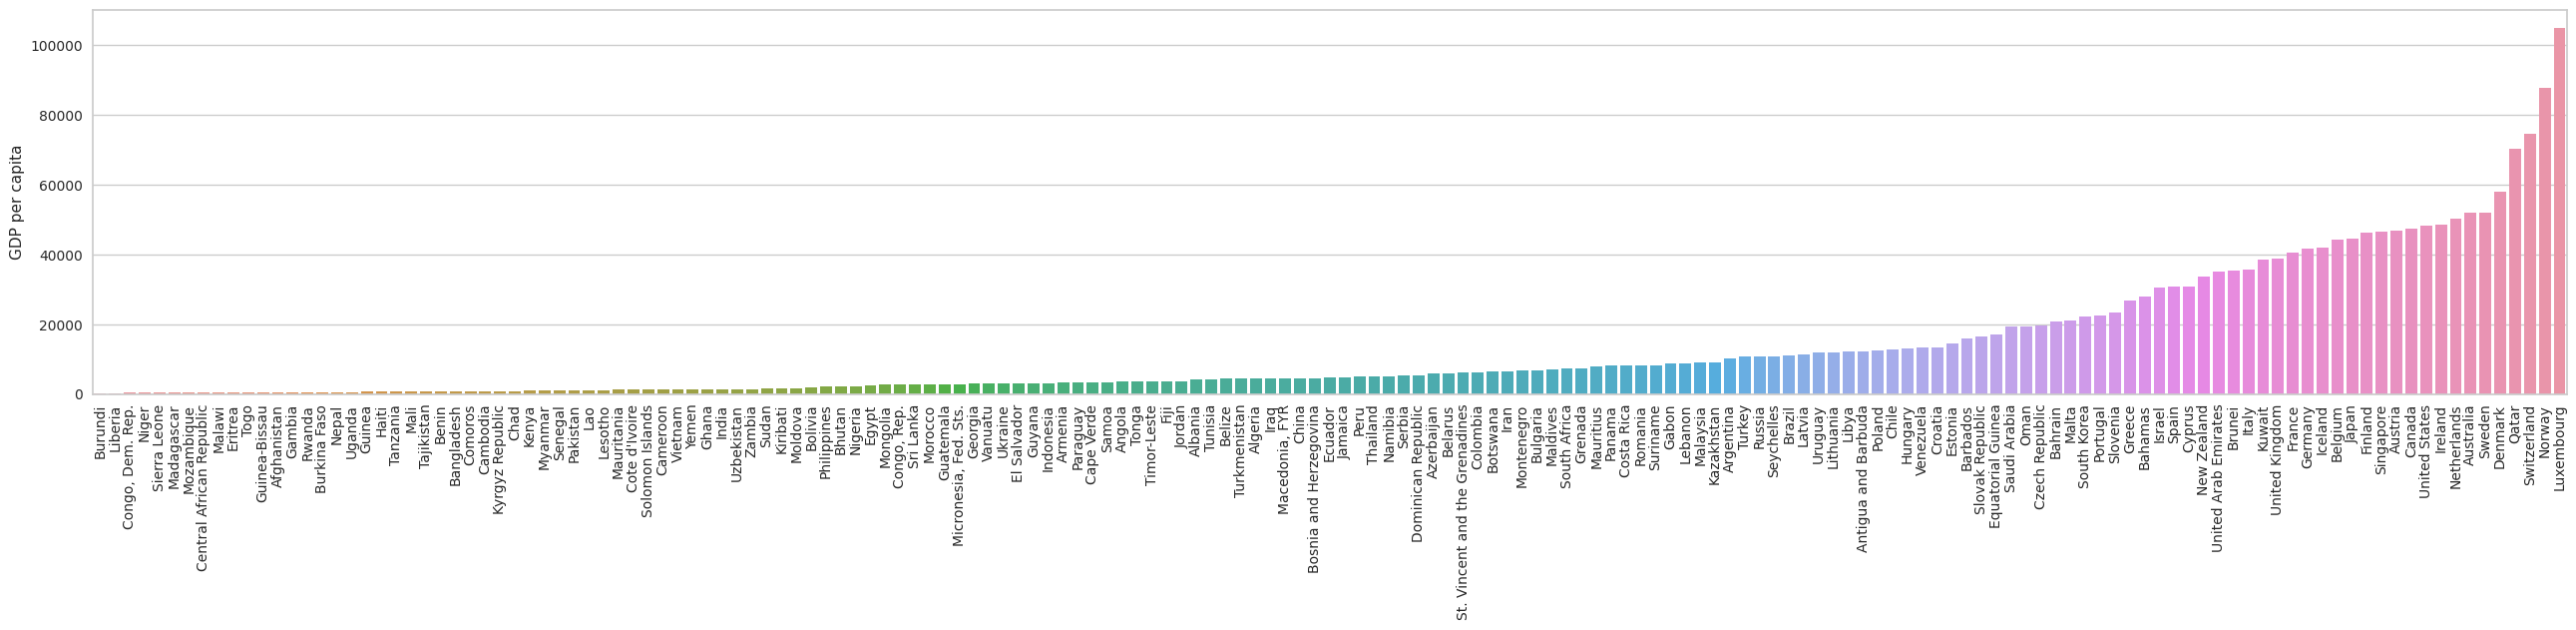

In [52]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

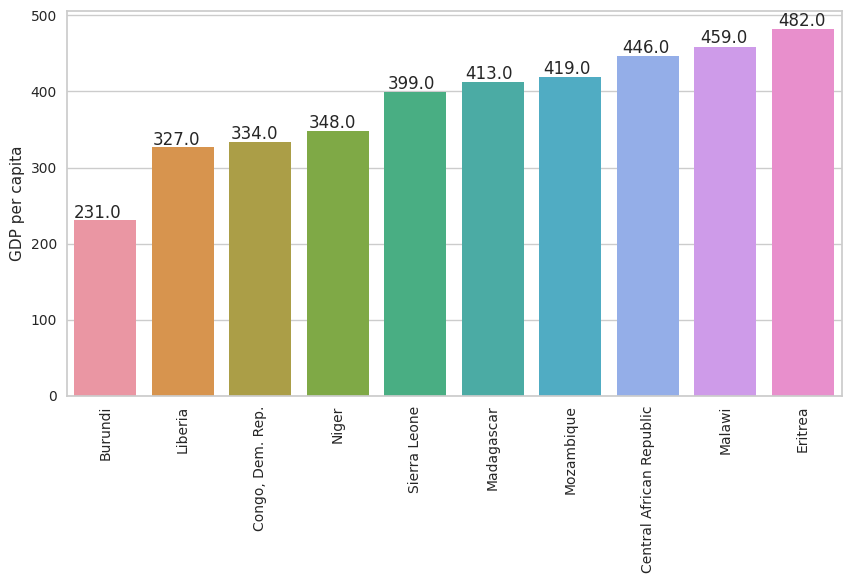

In [53]:

plt.figure(figsize = (10,5))
gdpp_bottom10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Lower gdp per capita countries belong to East Africa

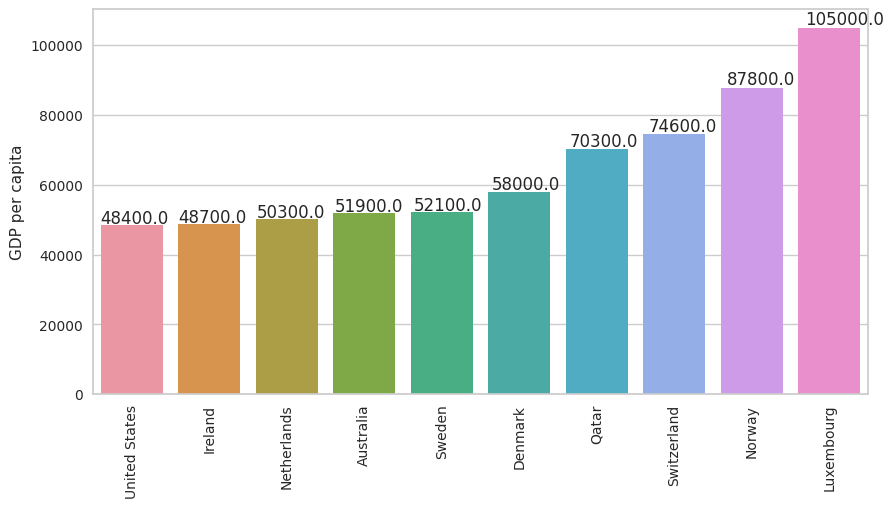

In [54]:
plt.figure(figsize = (10,5))
gdpp_top10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).tail(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()
     

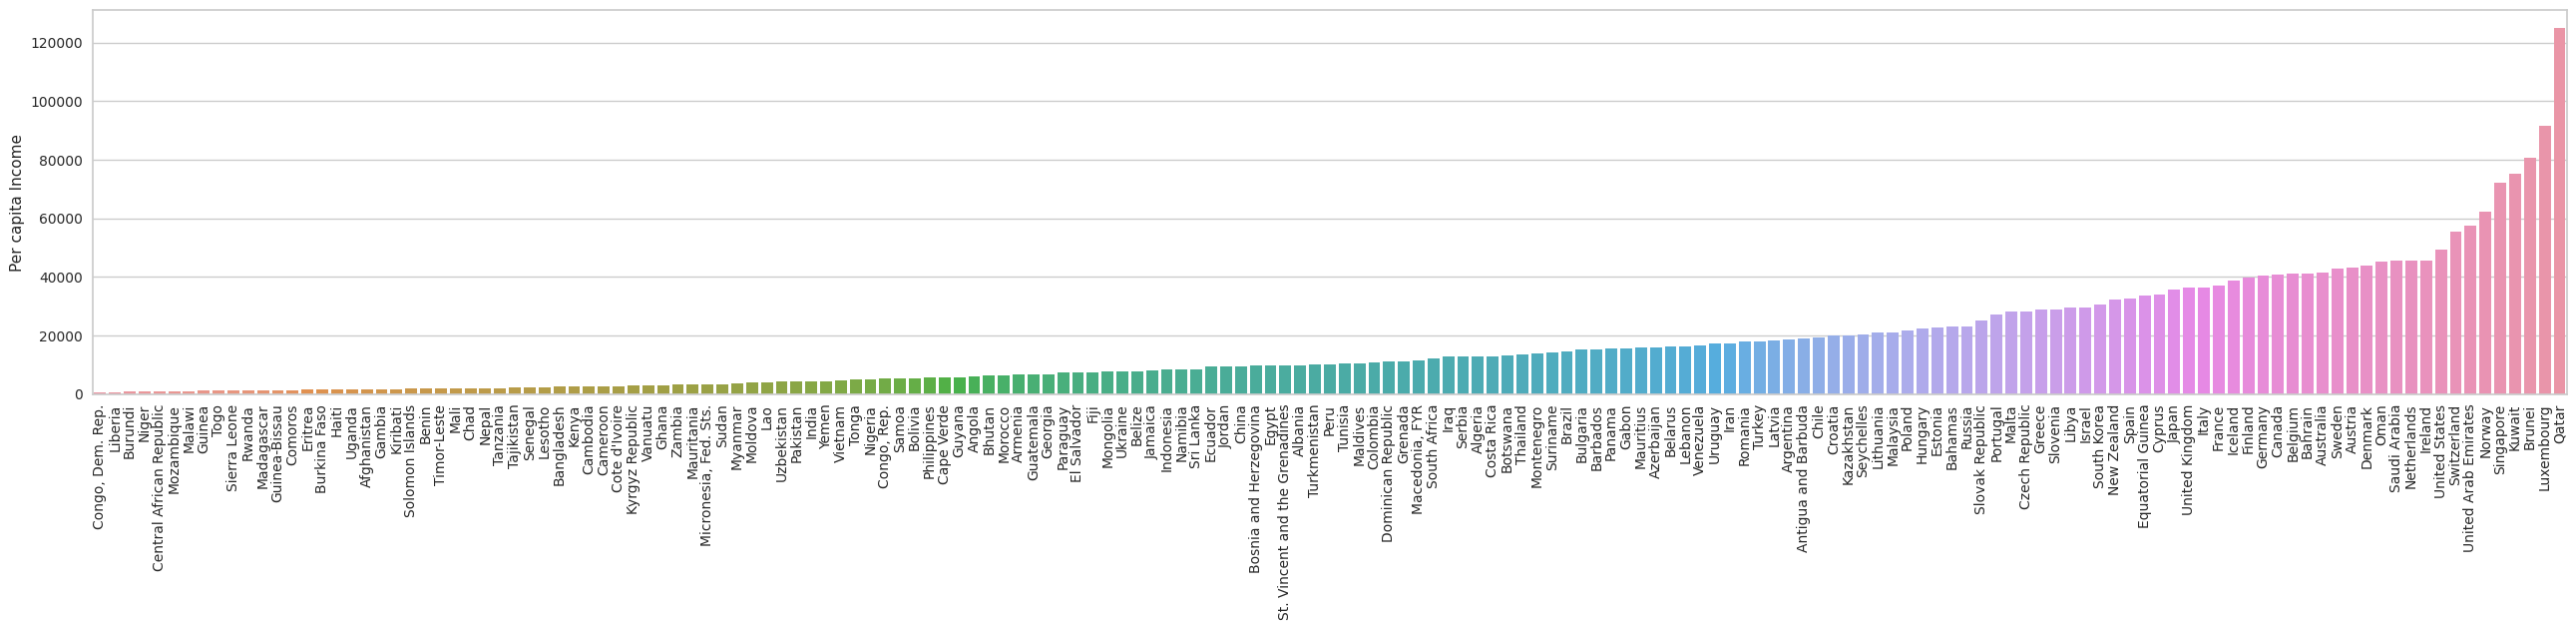

In [55]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = ngo[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

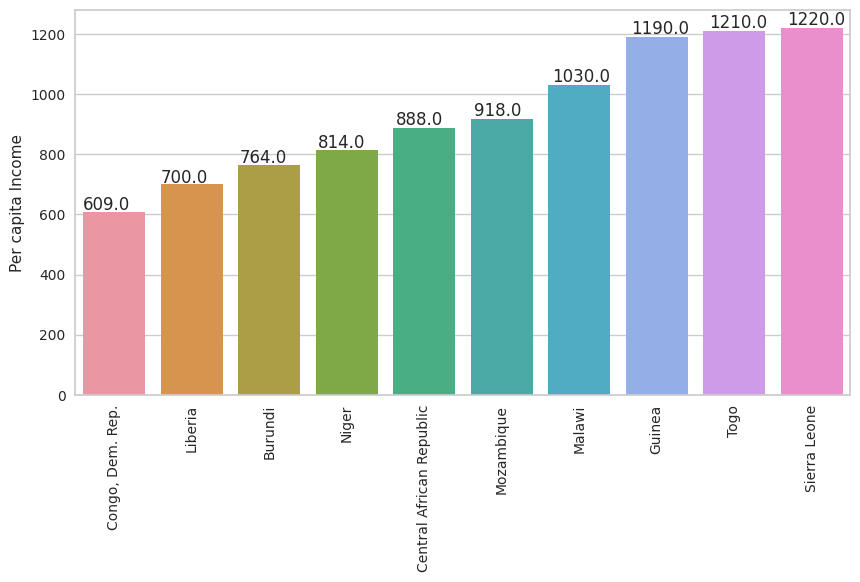

In [56]:
plt.figure(figsize = (10,5))
income_bottom10 = ngo[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

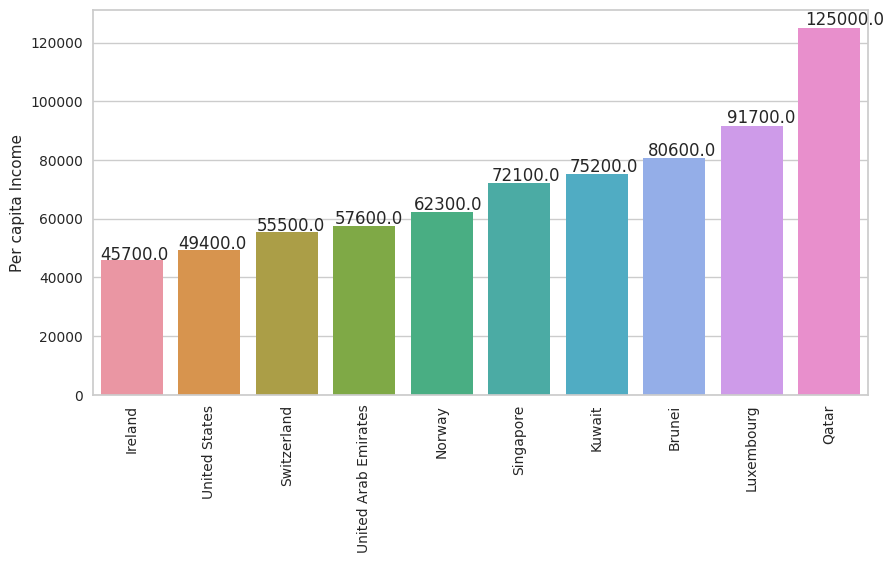

In [57]:
plt.figure(figsize = (10,5))
income_top10 = ngo[['country','income']].sort_values('income', ascending = True).tail(10)
ax = sns.barplot(x='country', y='income', data= income_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

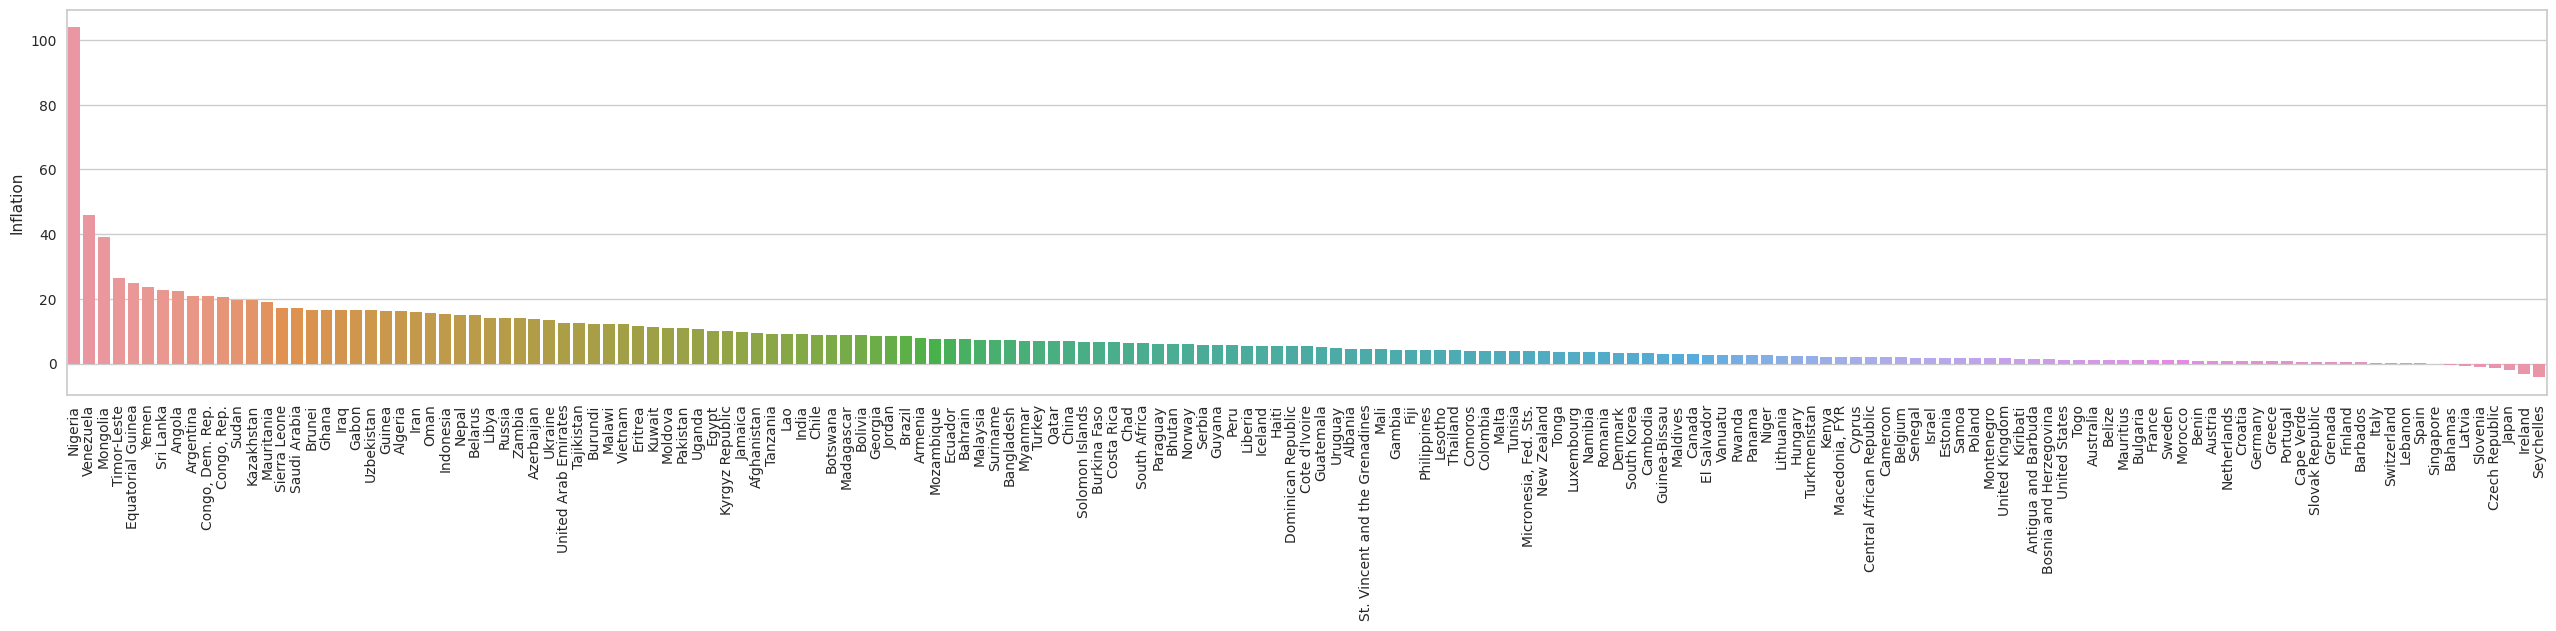

In [58]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

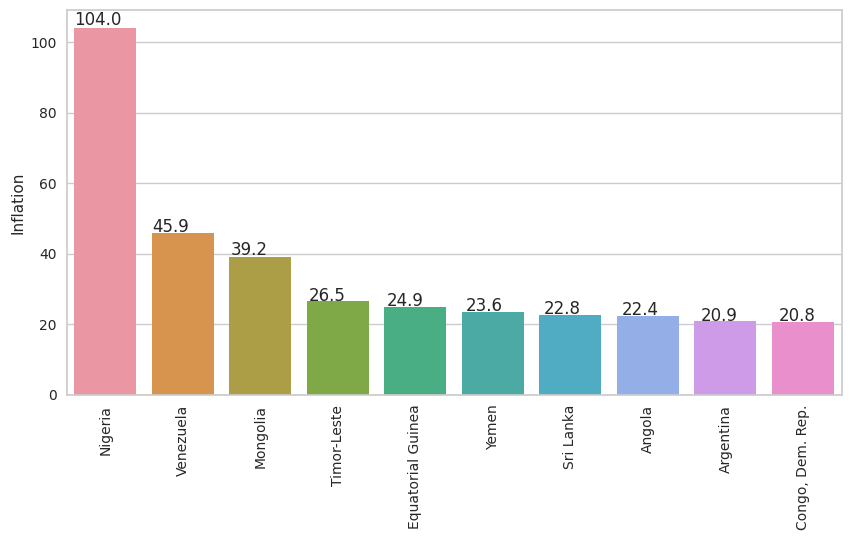

In [59]:
plt.figure(figsize = (10,5))
inflation_top10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

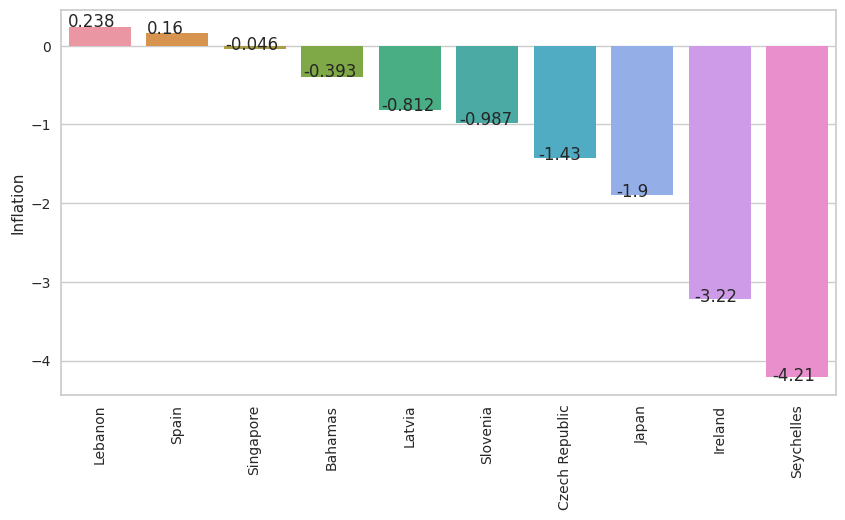

In [60]:
plt.figure(figsize = (10,5))
inflation_bottom10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).tail(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

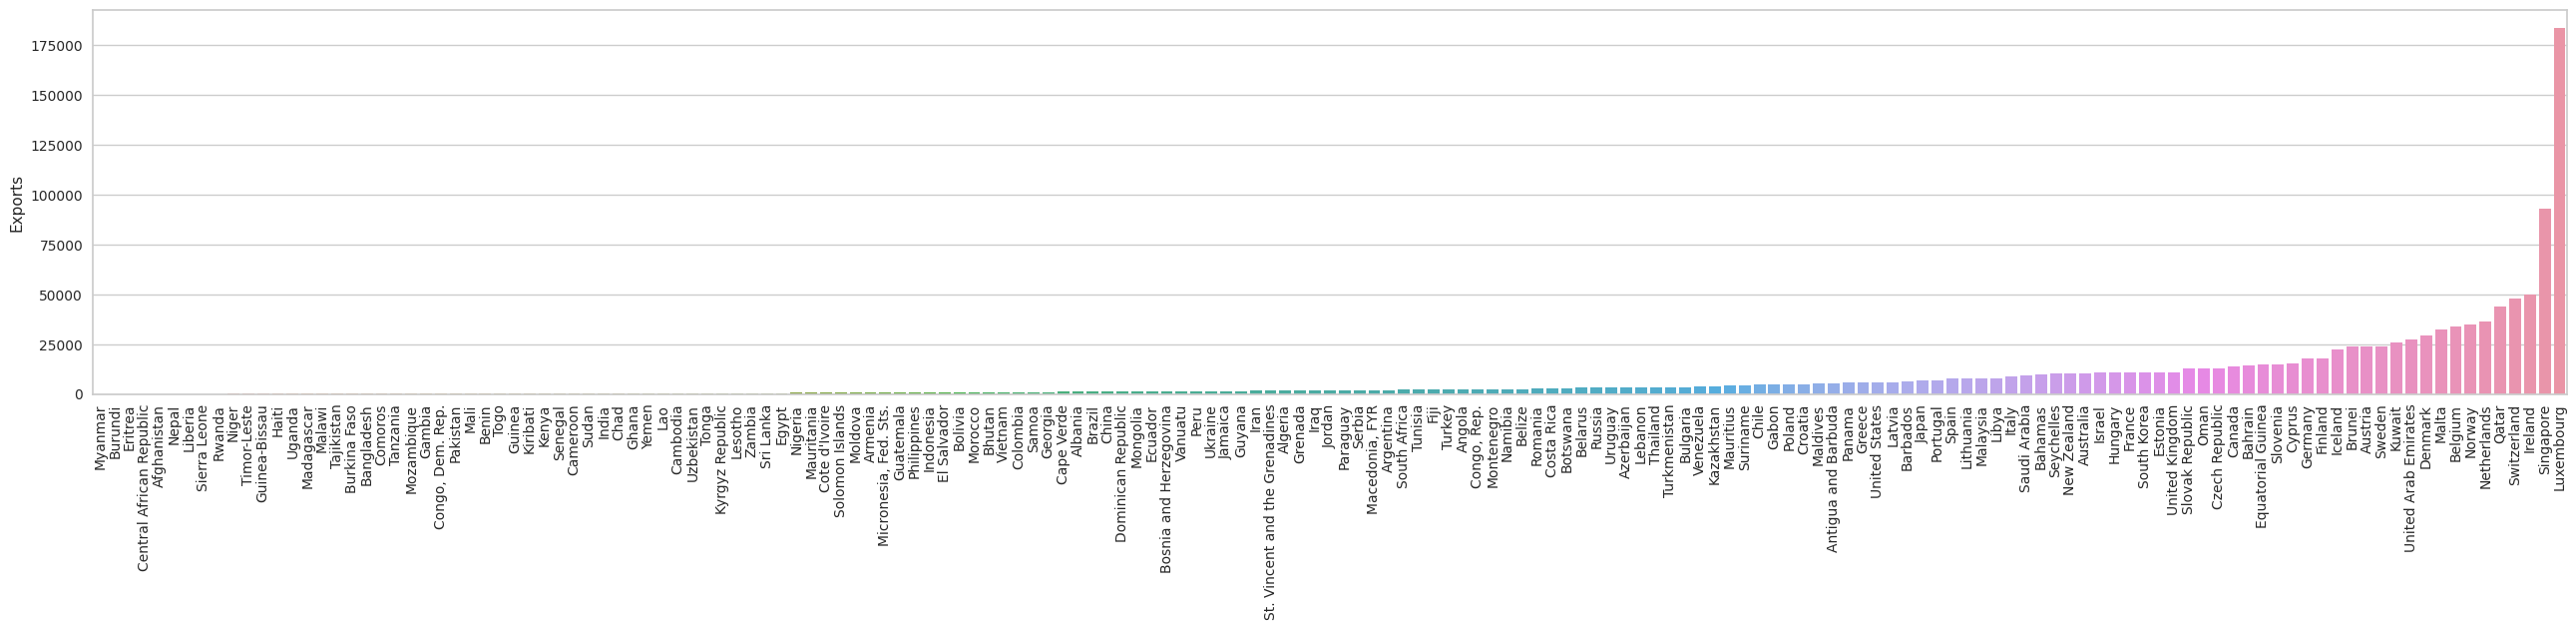

In [61]:
# Exports: Exports of goods and services.
plt.figure(figsize = (32,5))
exports = ngo[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

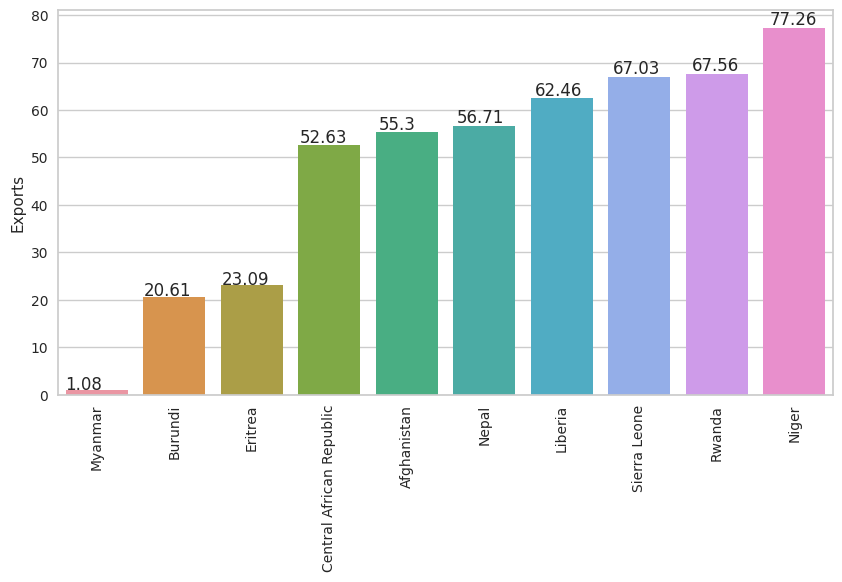

In [62]:
plt.figure(figsize = (10,5))
exports_bottom10 = ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

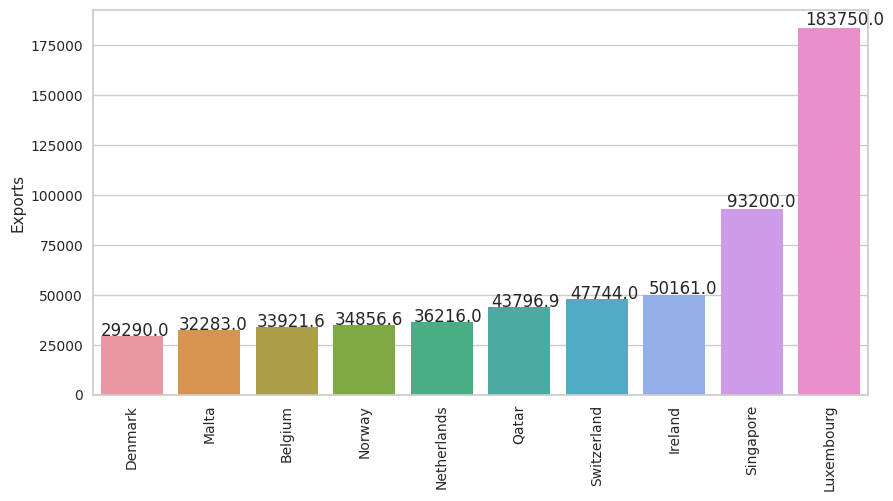

In [63]:
plt.figure(figsize = (10,5))
exports_top10 = ngo[['country','exports']].sort_values('exports', ascending = True).tail(10)
ax = sns.barplot(x='country', y='exports', data= exports_top10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

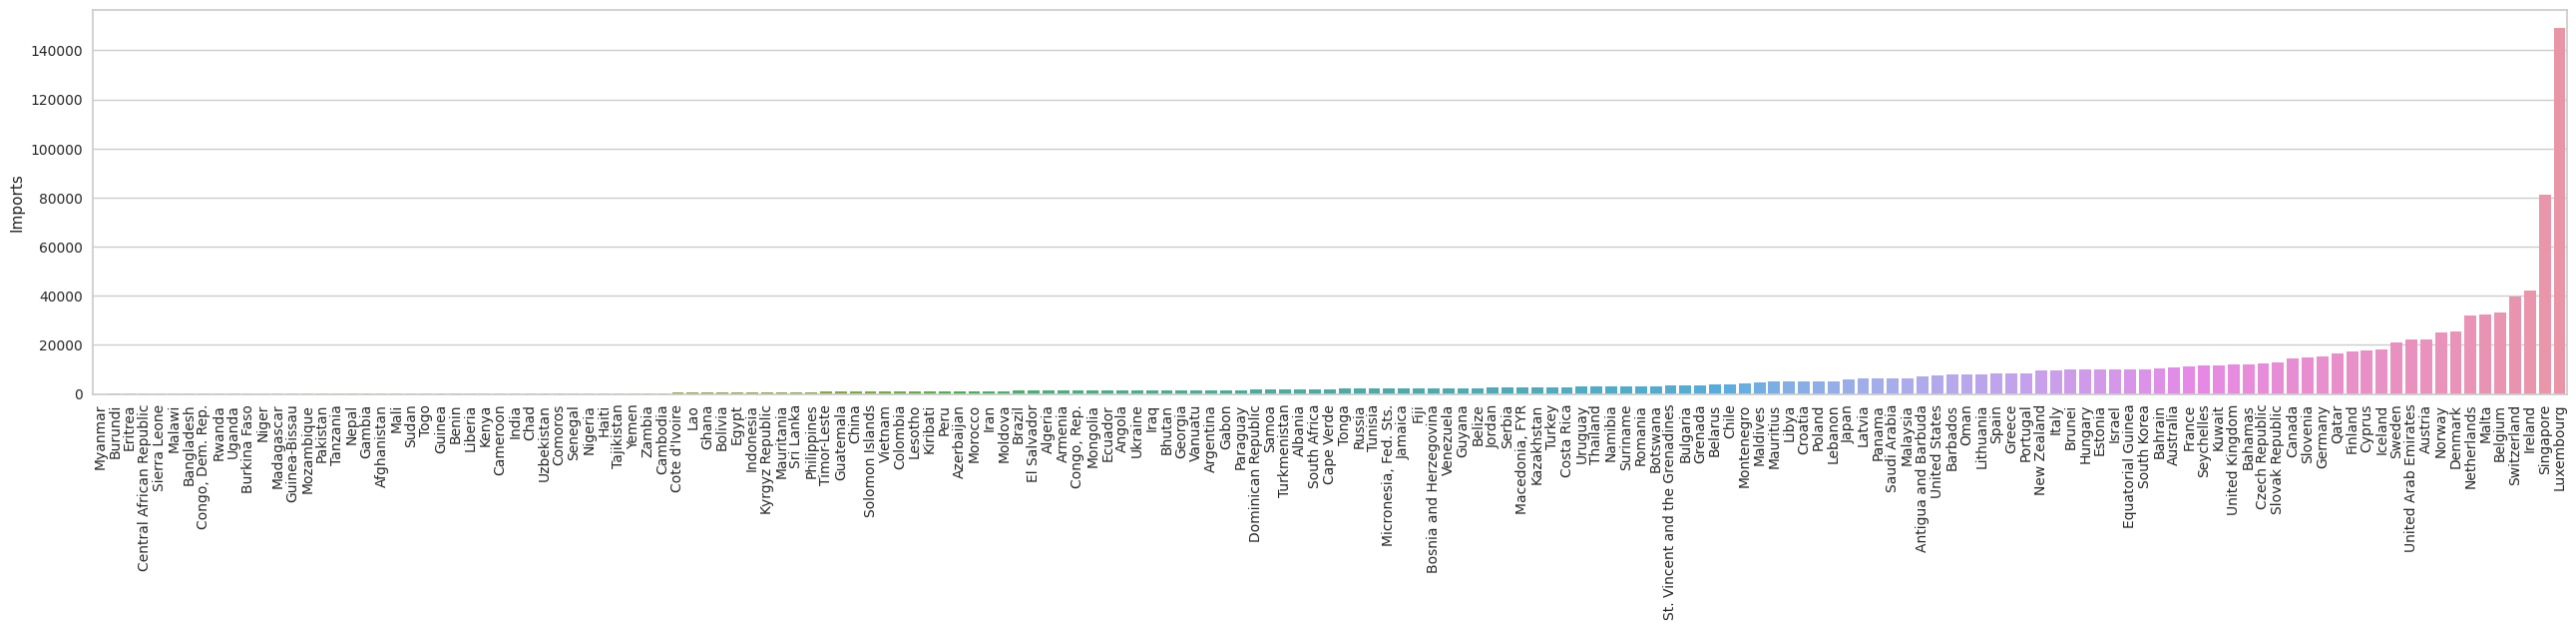

In [64]:
# Imports: Imports of goods and services.
plt.figure(figsize = (32,5))
imports = ngo[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

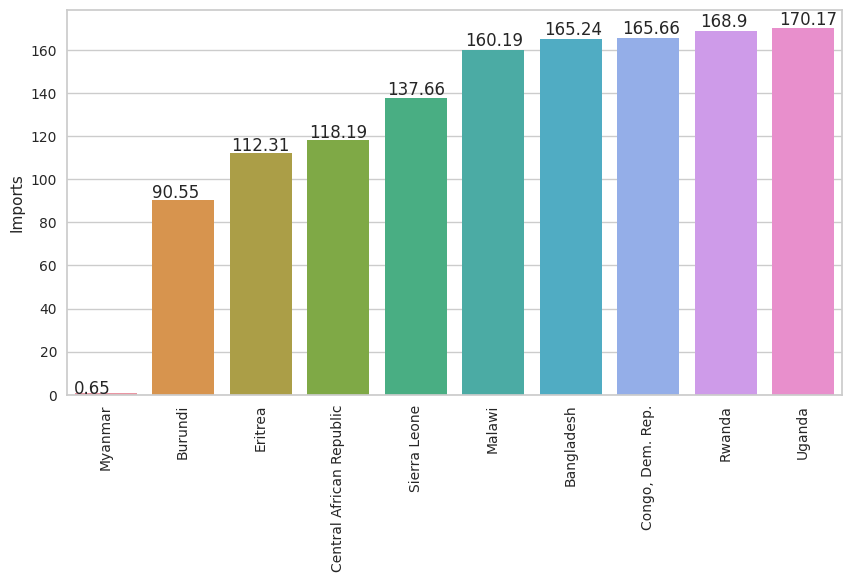

In [65]:
plt.figure(figsize = (10,5))
imports_bottom10 = ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

Lets Look at the lowest 5 countries for each factor

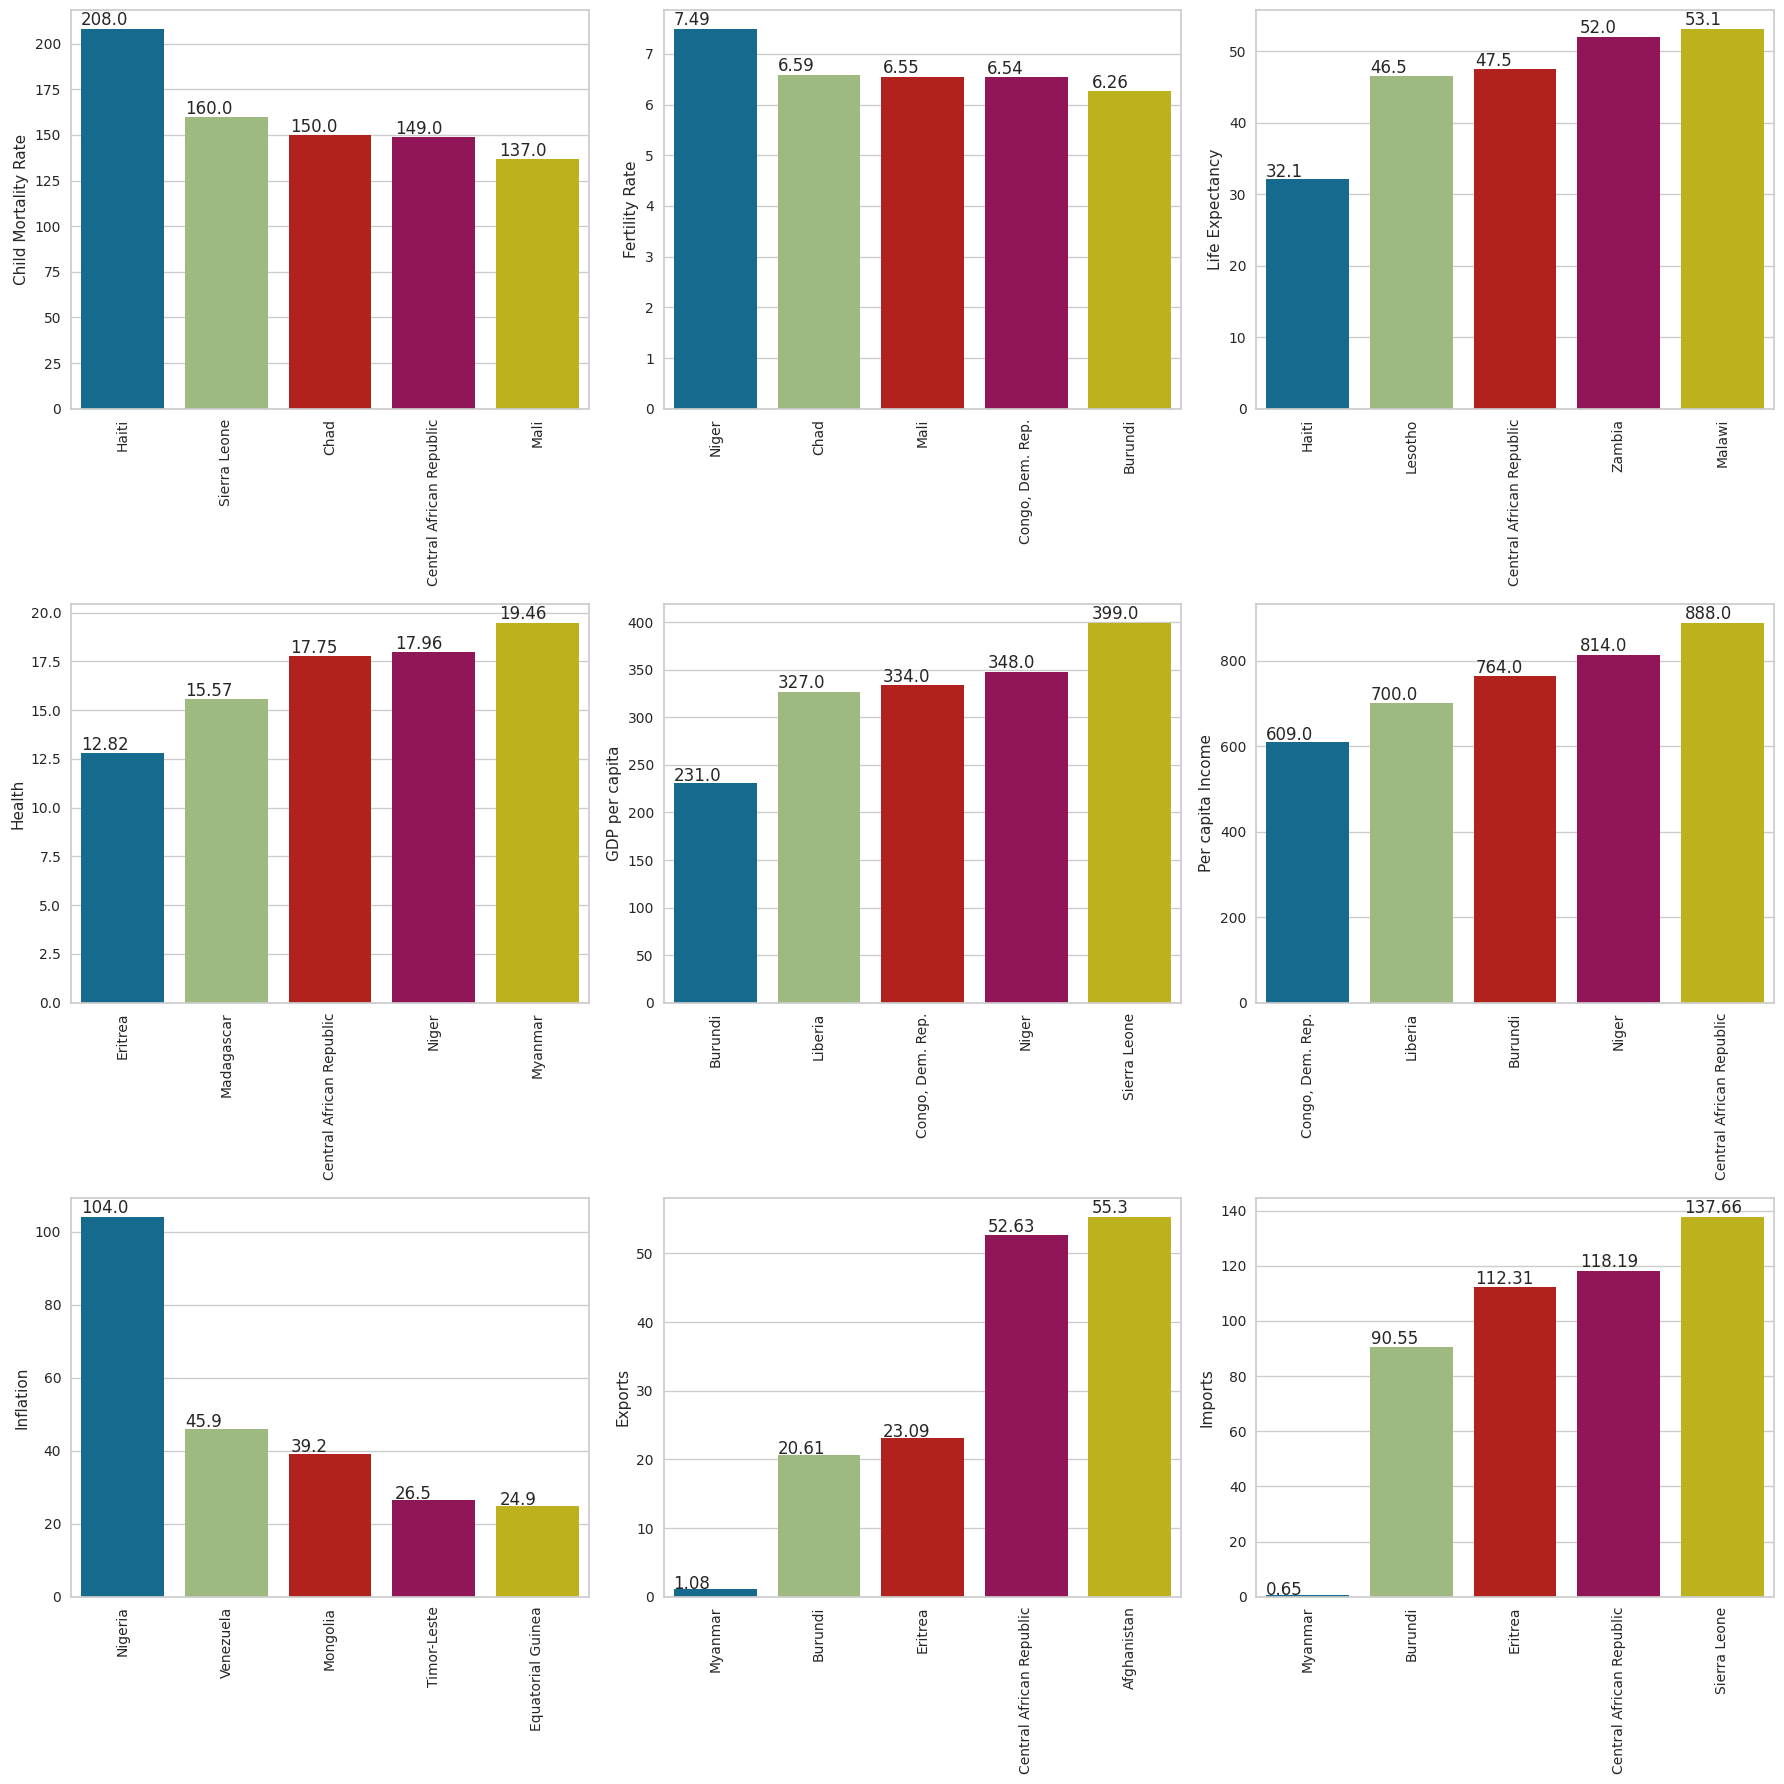

In [66]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = ngo[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = ngo[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = ngo[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = ngo[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('EDA')
plt.show()

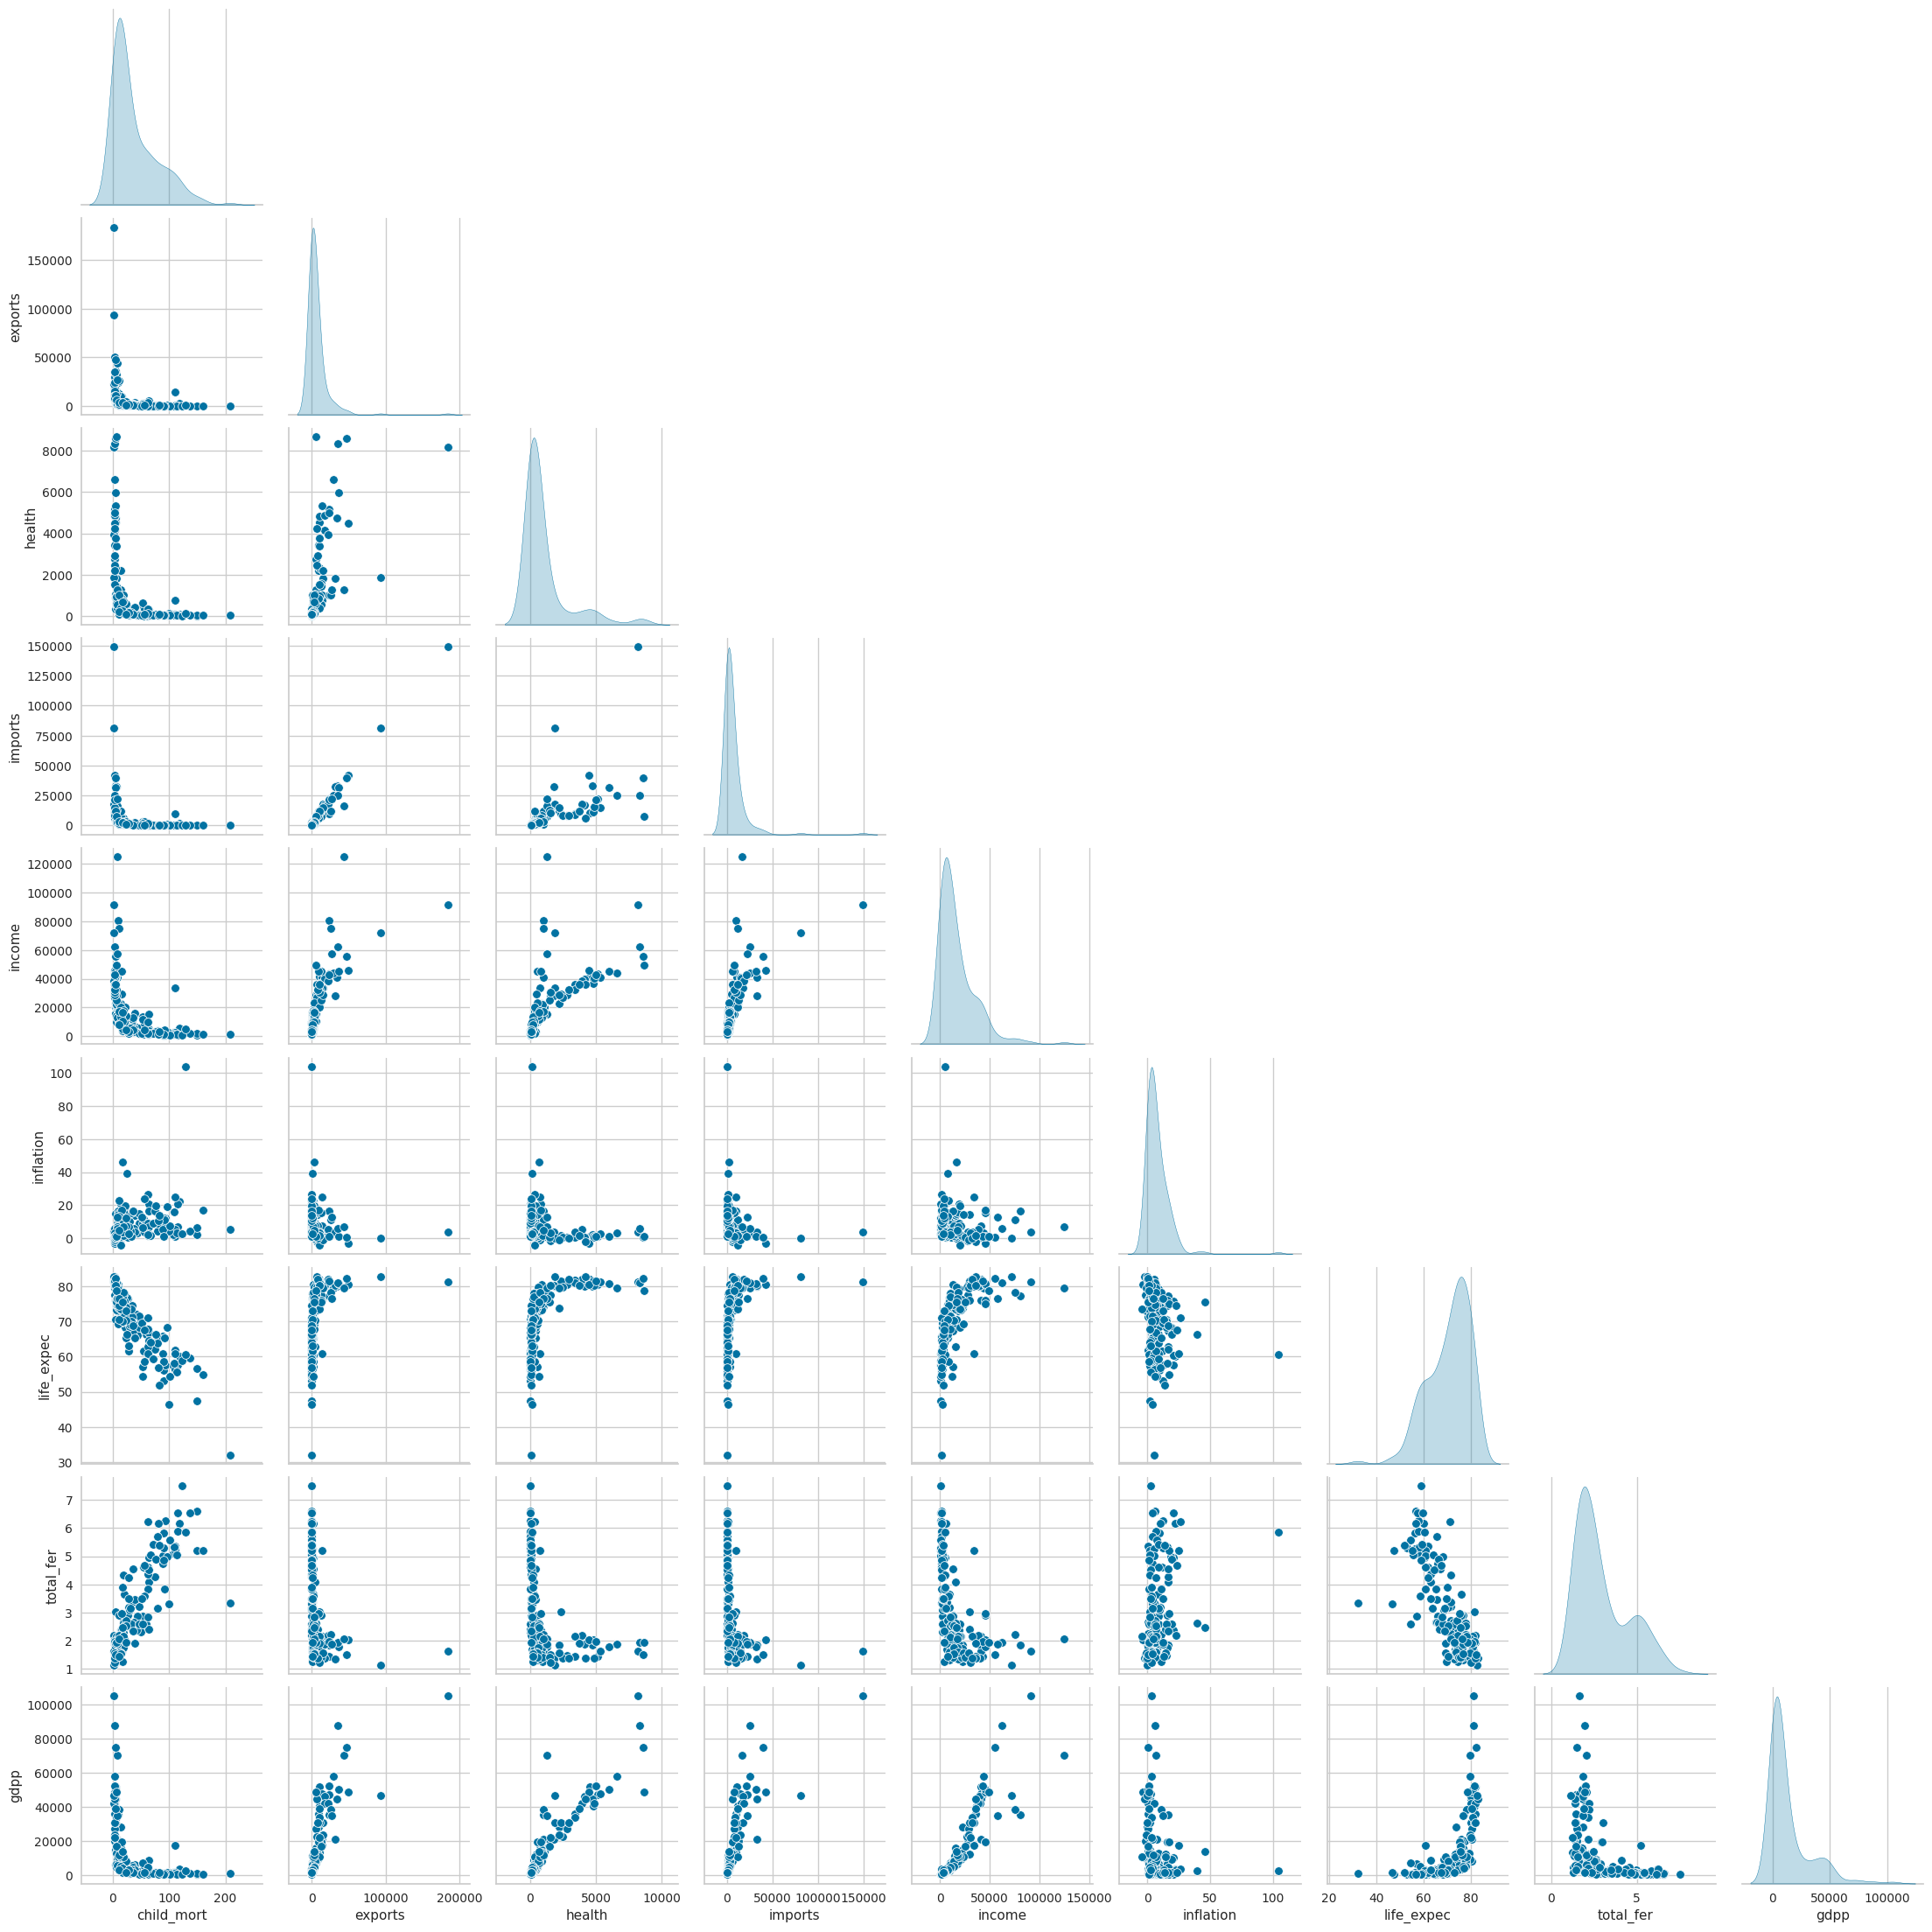

In [68]:
sns.pairplot(ngo,corner=True,diag_kind="kde")
plt.show()

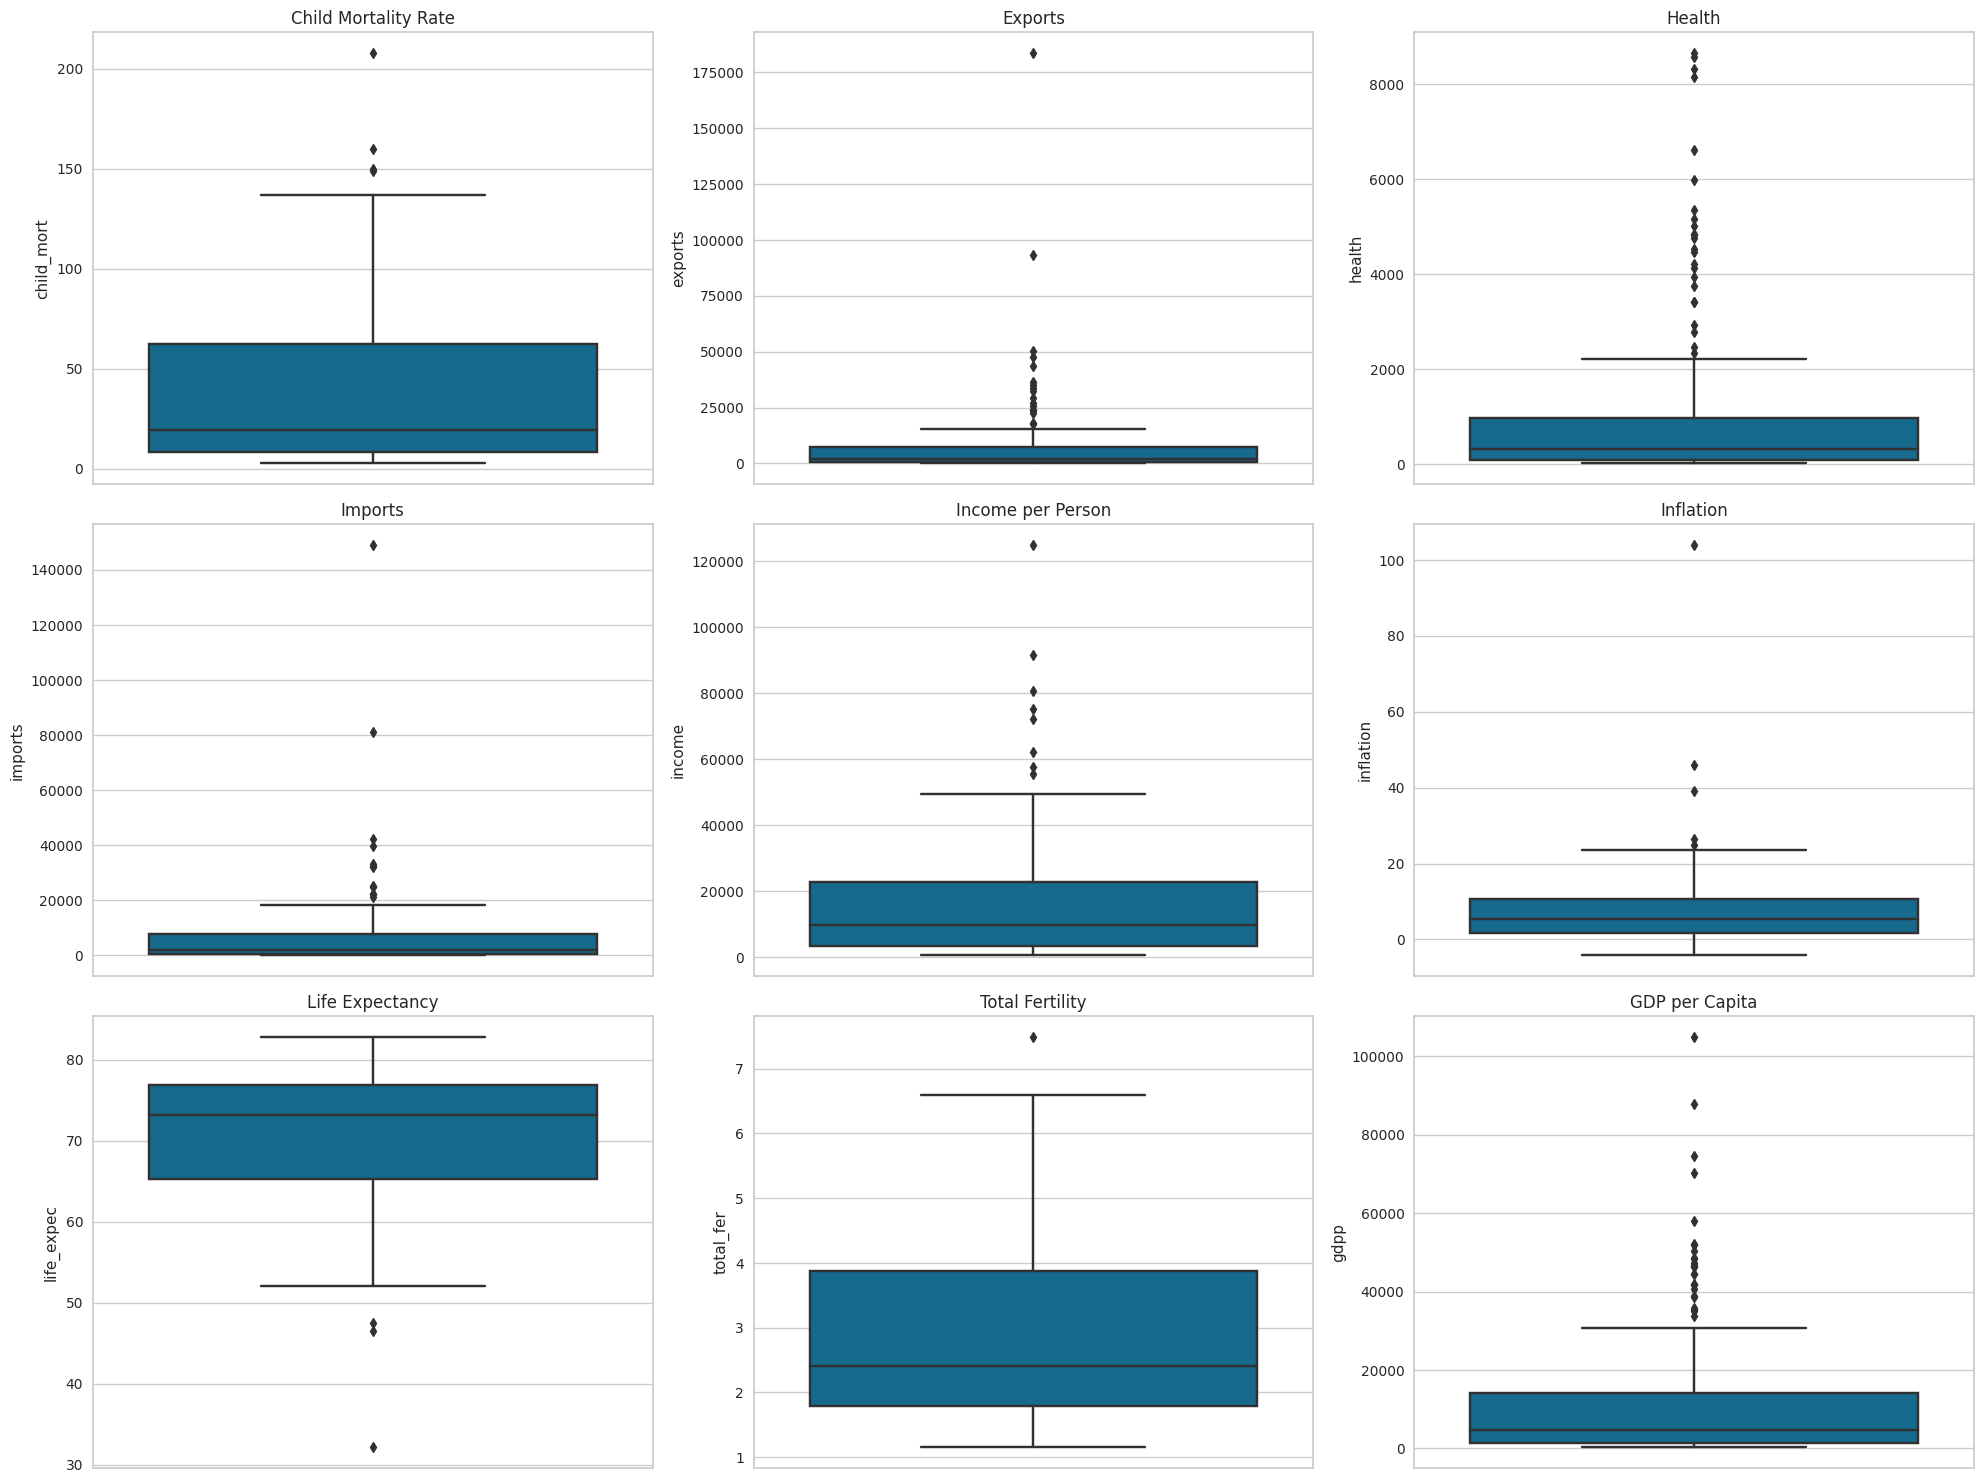

In [69]:
# Assuming ngo is your DataFrame
f, axes = plt.subplots(3, 3, figsize=(20, 15))

# Create box plots instead of violin plots
sns.boxplot(y=ngo.child_mort, ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')

sns.boxplot(y=ngo.exports, ax=axes[0, 1])
axes[0, 1].set_title('Exports')

sns.boxplot(y=ngo.health, ax=axes[0, 2])
axes[0, 2].set_title('Health')

sns.boxplot(y=ngo.imports, ax=axes[1, 0])
axes[1, 0].set_title('Imports')

sns.boxplot(y=ngo.income, ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')

sns.boxplot(y=ngo.inflation, ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

sns.boxplot(y=ngo.life_expec, ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')

sns.boxplot(y=ngo.total_fer, ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')

sns.boxplot(y=ngo.gdpp, ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_subplots.png')
plt.show()

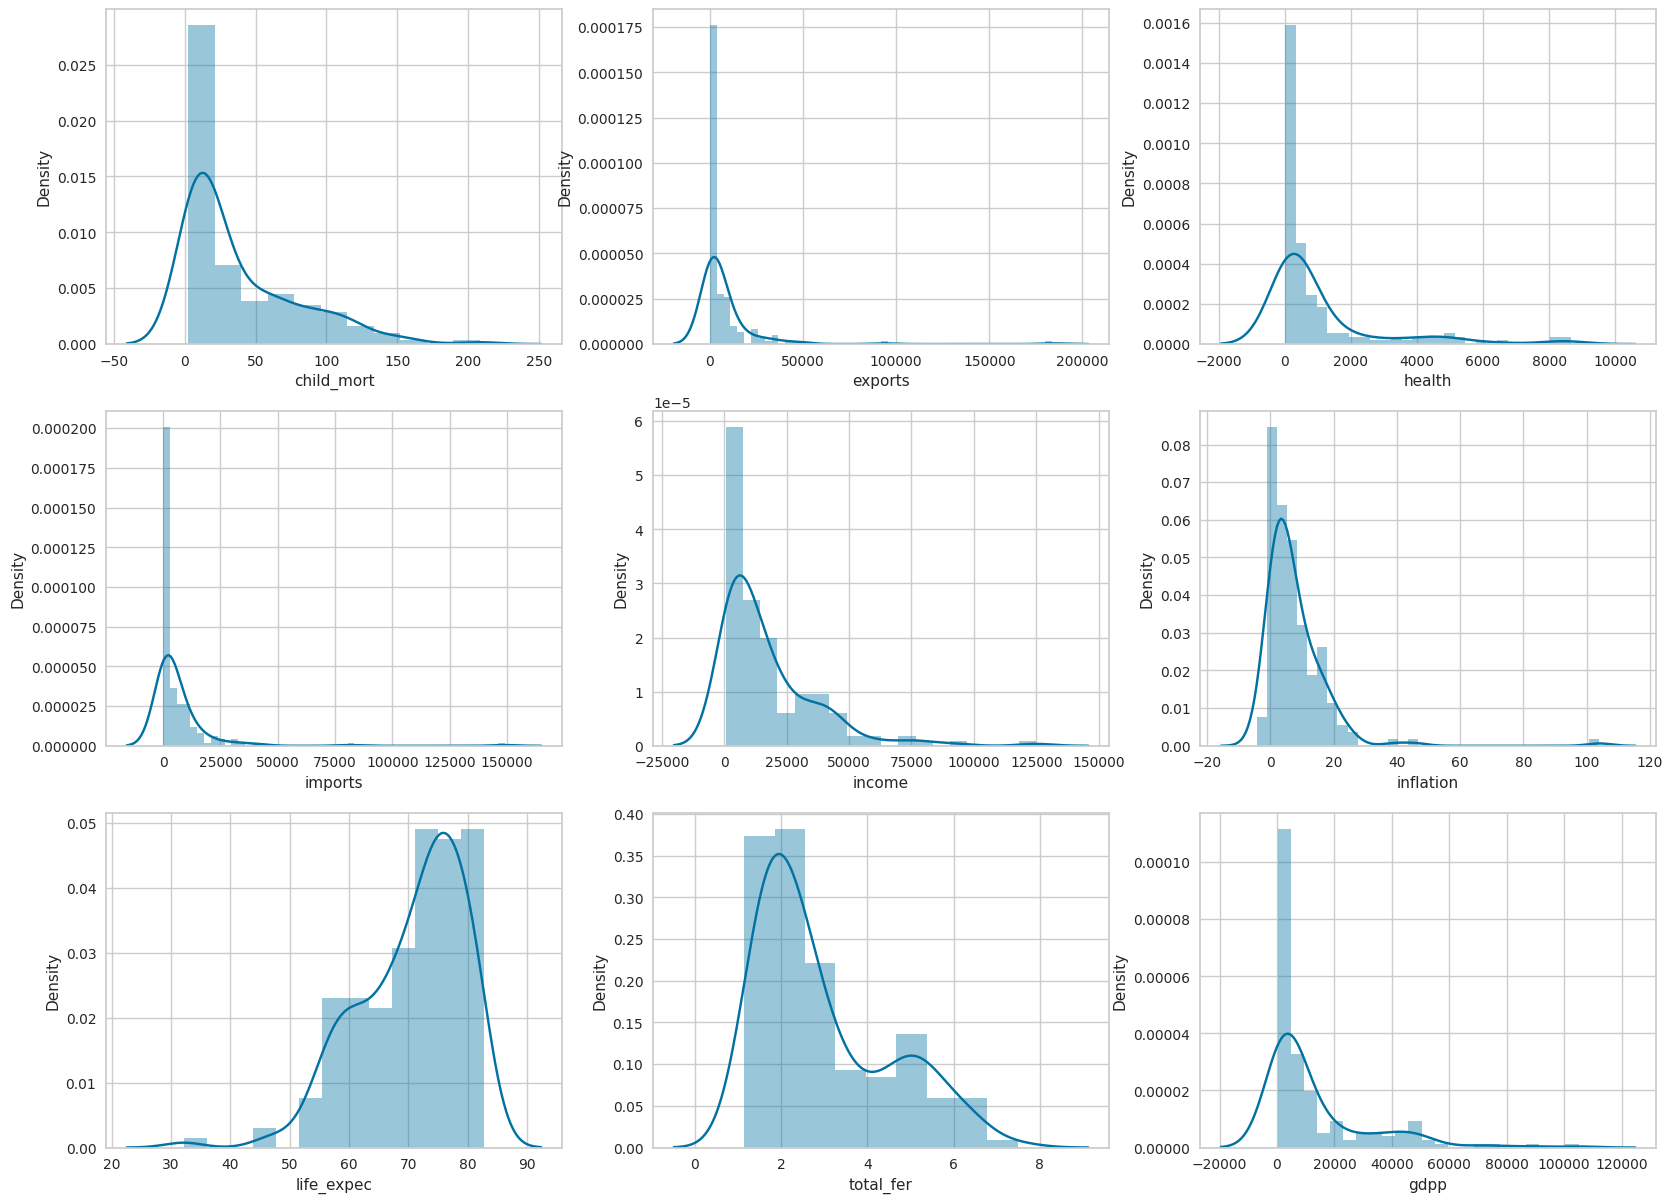

In [70]:
plt.figure(figsize = (20,20))
features=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(ngo[i[1]])

In [72]:
Q3 = ngo.exports.quantile(0.95)
Q1 = ngo.exports.quantile(0.05)
ngo['exports'][ngo['exports']<=Q1]=Q1
ngo['exports'][ngo['exports']>=Q3]=Q3

Q3 = ngo.imports.quantile(0.95)
Q1 = ngo.imports.quantile(0.05)
ngo['imports'][ngo['imports']<=Q1]=Q1
ngo['imports'][ngo['imports']>=Q3]=Q3

Q3 = ngo.health.quantile(0.95)
Q1 = ngo.health.quantile(0.05)
ngo['health'][ngo['health']<=Q1]=Q1
ngo['health'][ngo['health']>=Q3]=Q3

Q3 = ngo.income.quantile(0.95)
Q1 = ngo.income.quantile(0.05)
ngo['income'][ngo['income']<=Q1]=Q1
ngo['income'][ngo['income']>=Q3]=Q3

Q3 = ngo.inflation.quantile(0.95)
Q1 = ngo.inflation.quantile(0.05)
ngo['inflation'][ngo['inflation']<=Q1]=Q1
ngo['inflation'][ngo['inflation']>=Q3]=Q3

Q3 = ngo.life_expec.quantile(0.95)
Q1 = ngo.life_expec.quantile(0.05)
ngo['life_expec'][ngo['life_expec']<=Q1]=Q1
ngo['life_expec'][ngo['life_expec']>=Q3]=Q3

Q3 = ngo.child_mort.quantile(0.95)
Q1 = ngo.child_mort.quantile(0.05)
ngo['child_mort'][ngo['child_mort']<=Q1]=Q1
ngo['child_mort'][ngo['child_mort']>=Q3]=Q3

Q3 = ngo.total_fer.quantile(0.95)
Q1 = ngo.total_fer.quantile(0.05)
ngo['total_fer'][ngo['total_fer']<=Q1]=Q1
ngo['total_fer'][ngo['total_fer']>=Q3]=Q3

Q3 = ngo.gdpp.quantile(0.95)
Q1 = ngo.gdpp.quantile(0.05)
ngo['gdpp'][ngo['gdpp']<=Q1]=Q1
ngo['gdpp'][ngo['gdpp']>=Q3]=Q3

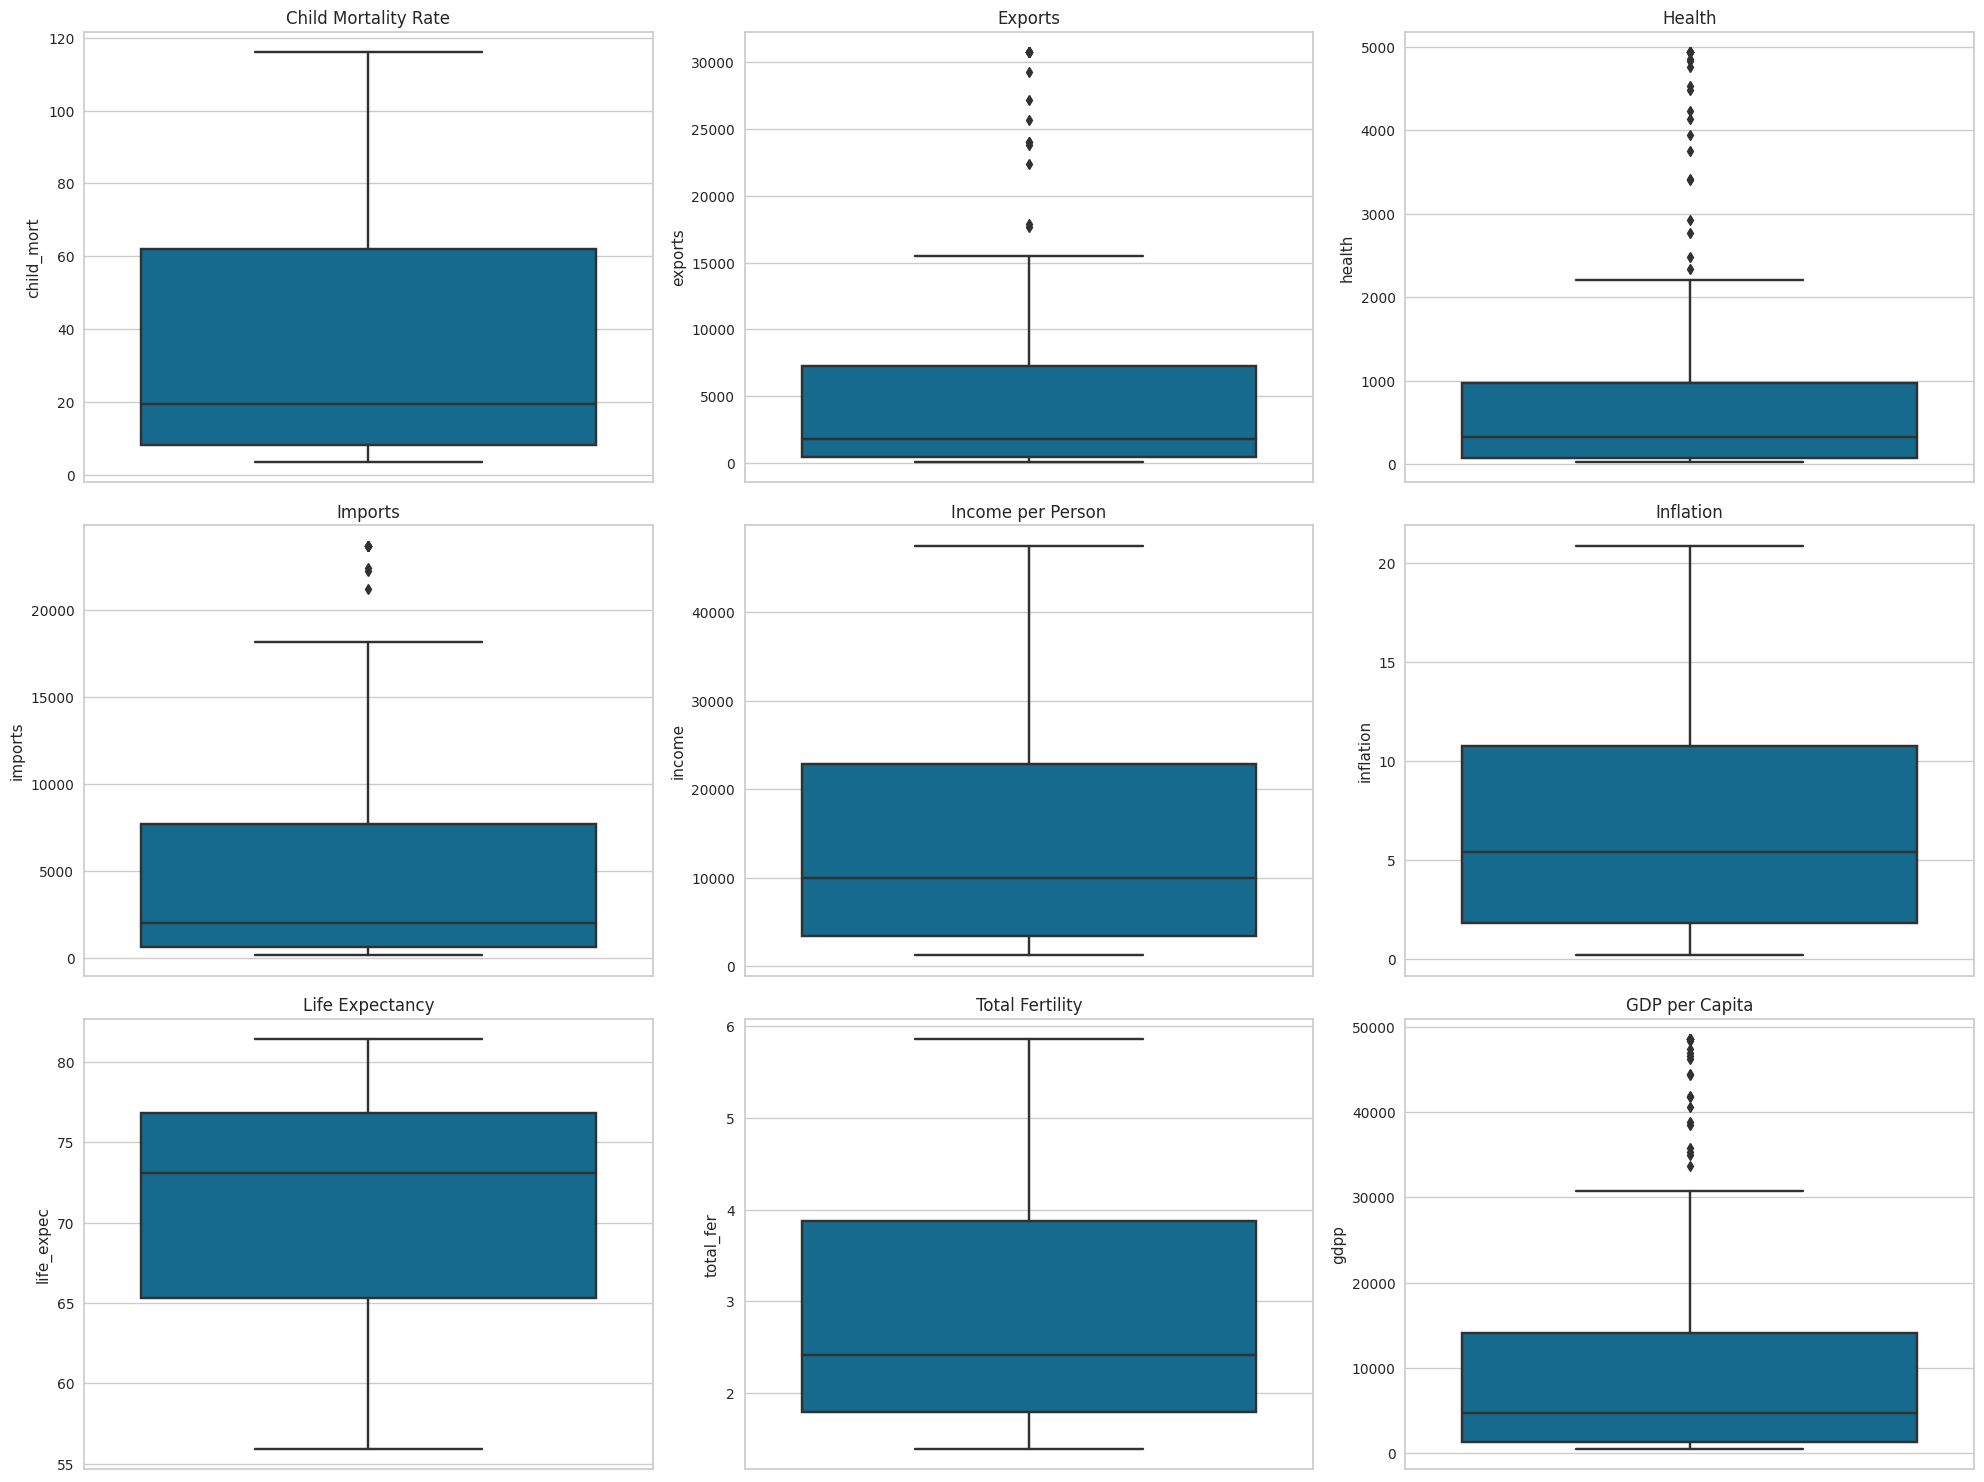

In [73]:
# Assuming ngo is your DataFrame
f, axes = plt.subplots(3, 3, figsize=(20, 15))

# Create box plots instead of violin plots
sns.boxplot(y=ngo.child_mort, ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')

sns.boxplot(y=ngo.exports, ax=axes[0, 1])
axes[0, 1].set_title('Exports')

sns.boxplot(y=ngo.health, ax=axes[0, 2])
axes[0, 2].set_title('Health')

sns.boxplot(y=ngo.imports, ax=axes[1, 0])
axes[1, 0].set_title('Imports')

sns.boxplot(y=ngo.income, ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')

sns.boxplot(y=ngo.inflation, ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

sns.boxplot(y=ngo.life_expec, ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')

sns.boxplot(y=ngo.total_fer, ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')

sns.boxplot(y=ngo.gdpp, ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_subplots.png')
plt.show()

In [74]:
# Dropping Country field as final dataframe will only contain data columns

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')

In [75]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

In [76]:
ngo_df = pd.DataFrame(ngo_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
ngo_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.479611 -0.671776 -0.630757 -0.738139 -0.963751   0.387922   -1.829058   
1   -0.560119 -0.544868 -0.474216 -0.474209 -0.395220  -0.404189    0.682689   
2   -0.263582 -0.477735 -0.530960 -0.563322 -0.192271   1.453672    0.707681   
3    2.194625 -0.420173 -0.590102 -0.546035 -0.670602   2.213618   -1.341704   
4   -0.734715 -0.023628 -0.150184  0.314504  0.231394  -0.892257    0.745170   

   total_fer      gdpp  
0   2.021935 -0.758089  
1  -0.887524 -0.523860  
2  -0.022361 -0.499357  
3   2.046146 -0.560944  
4  -0.552623  0.013206

K-Means Clustering

Elbow Method to find right number of Clusters

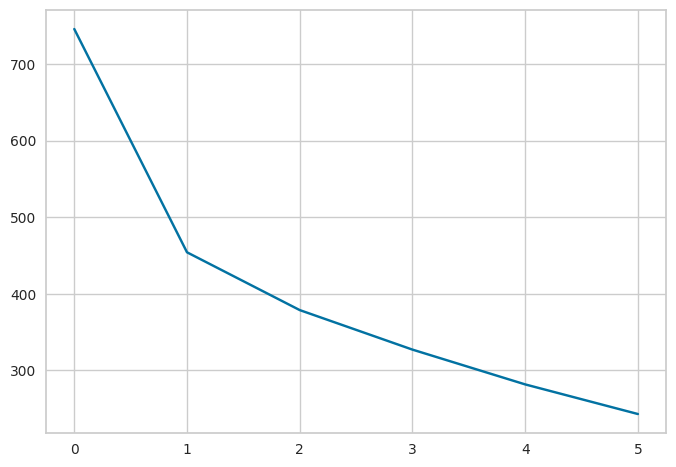

In [77]:
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(ngo_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

It seems good to choose 3 clusters

Silhoutte Analysis

In [78]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(ngo_df)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(ngo_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4852447658678948
For n_clusters=3, the silhouette score is 0.42099241192279424
For n_clusters=4, the silhouette score is 0.38366710861160225
For n_clusters=5, the silhouette score is 0.32567059978396456
For n_clusters=6, the silhouette score is 0.3035512735192097
For n_clusters=7, the silhouette score is 0.33292024288644073
For n_clusters=8, the silhouette score is 0.3426298694012623


In [79]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(ngo_df)

KMeans(max_iter=150, n_clusters=3, random_state=50)

In [80]:
cluster.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [81]:
ngo['Cluster_Id'] = cluster.labels_
ngo.head()

country  child_mort     exports    health   imports   income  \
0          Afghanistan        90.2    72.50496   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20000  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64000  185.9820  1400.440  12900.0   
3               Angola       116.0  2199.19000  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00000  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  Cluster_Id  
0      9.440        56.2     5.8200    553.0           2  
1      4.490        76.3     1.6500   4090.0           0  
2     16.100        76.5     2.8900   4460.0           0  
3     20.849        60.1     5.8547   3530.0           2  
4      1.440        76.8     2.1300  12200.0           0

In [82]:
ngo.Cluster_Id.value_counts(ascending=True)

Cluster_Id
1    37
2    48
0    82
Name: count, dtype: int64

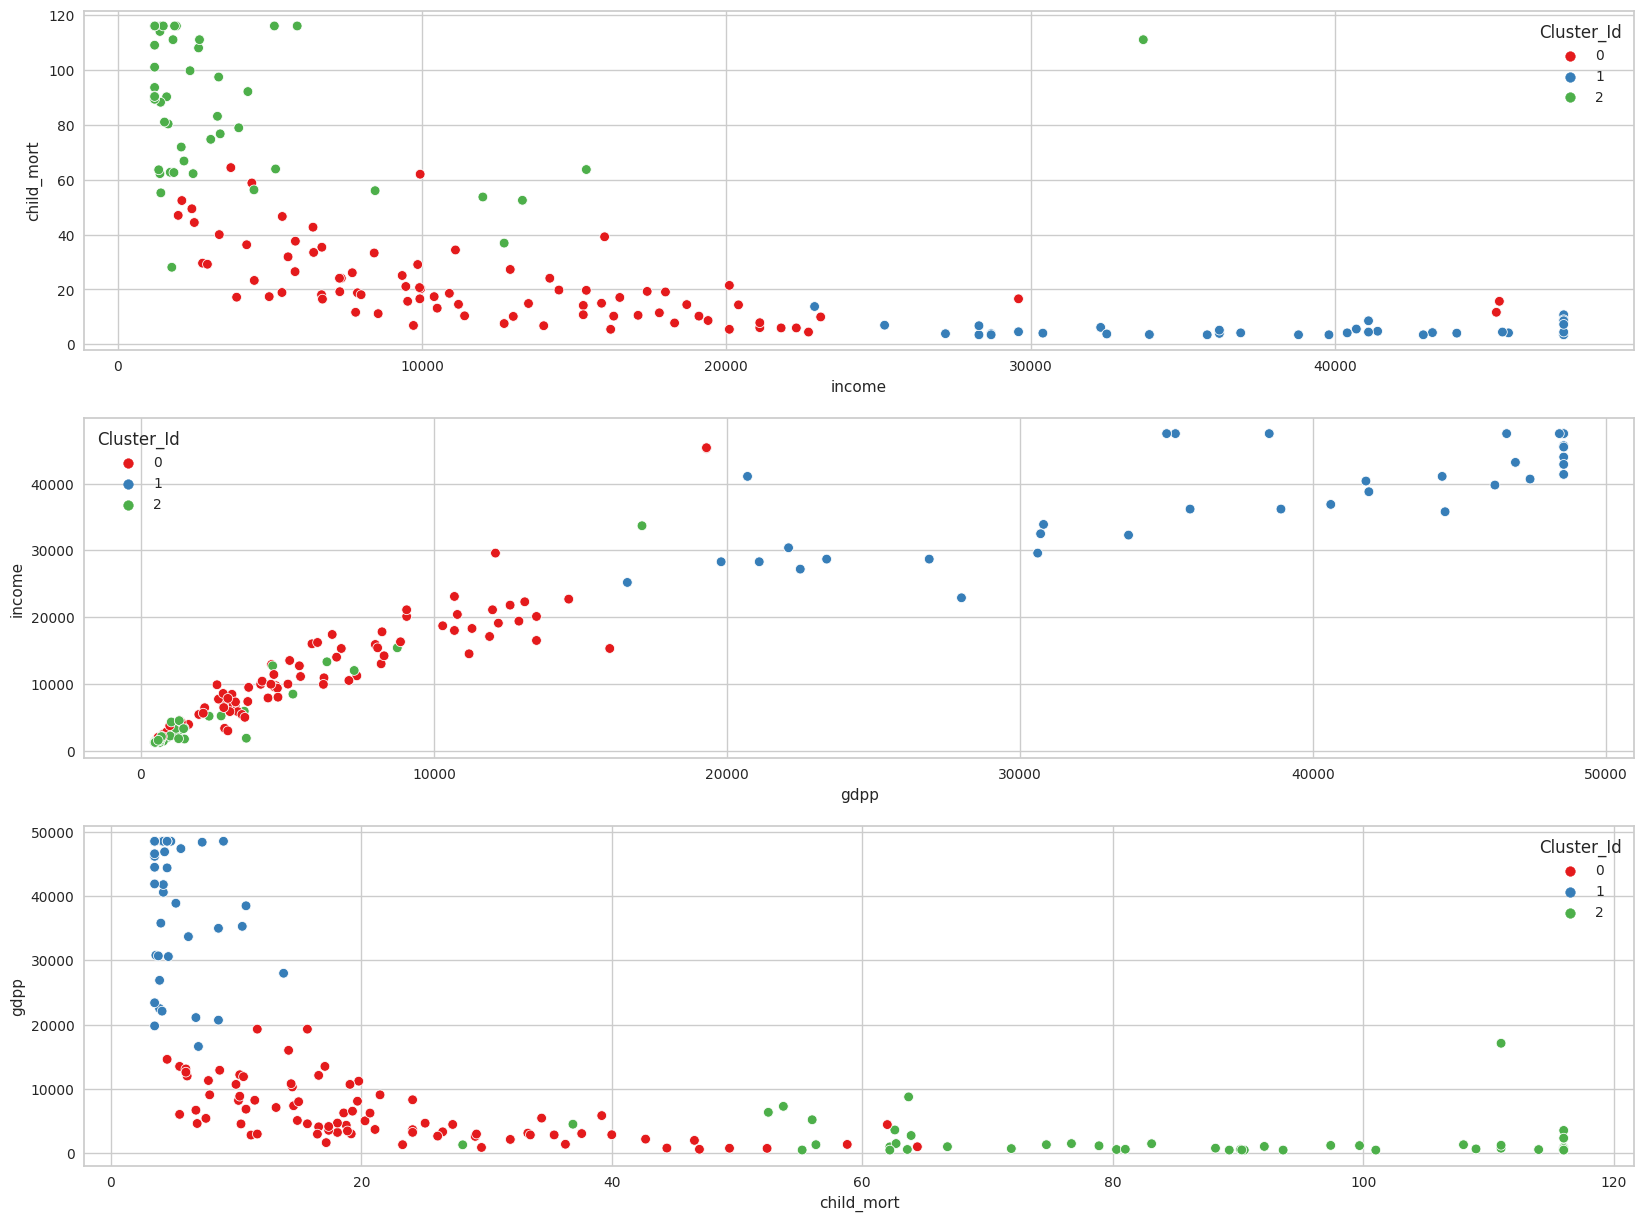

In [83]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = ngo,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = ngo,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=ngo,legend='full',palette="Set1")
plt.savefig('Clusters.png')
plt.show()

0 -> Developing Countries

1 -> Developed Countries

2 -> Least Developed Countries

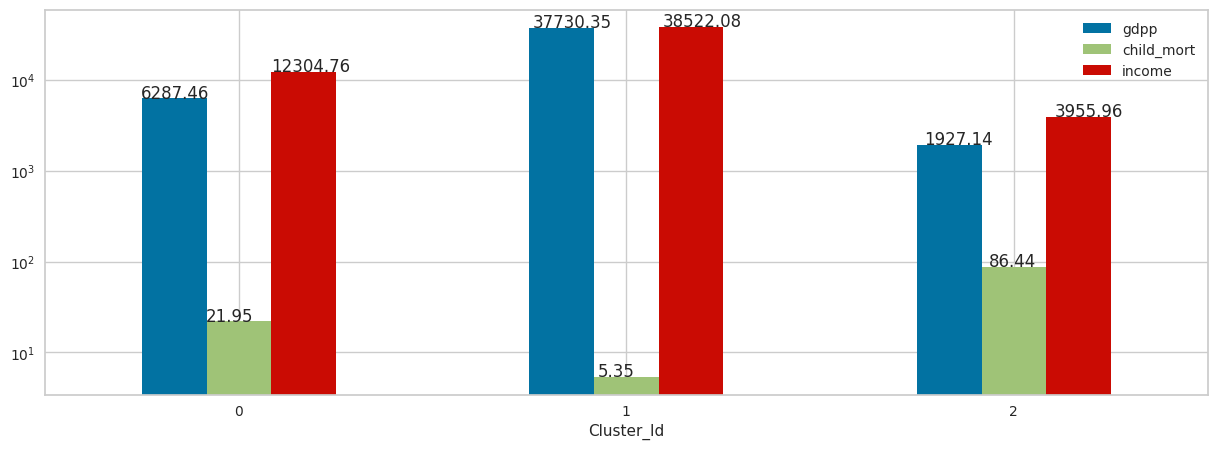

In [84]:
ax=ngo[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

In [85]:
ngo[ngo['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

country  child_mort   exports   health  imports   income  inflation  \
10   Bahamas        13.8   9800.00  2209.20  12236.0  22900.0    0.19978   
82    Kuwait        10.8  25679.50  1012.55  11704.0  47513.0   11.20000   
23    Brunei        10.5  23792.20  1002.52   9884.0  47513.0   16.70000   
123    Qatar         9.0  30756.57  1272.43  16731.4  47513.0    6.98000   
11   Bahrain         8.6  14386.50  1028.79  10536.3  41100.0    7.44000   

     life_expec  total_fer     gdpp  Cluster_Id  
10         73.8       1.86  28000.0           1  
82         78.2       2.21  38500.0           1  
23         77.1       1.84  35300.0           1  
123        79.5       2.07  48547.0           1  
11         76.0       2.16  20700.0           1

In [86]:
ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Least developed countries as per UN & IMF

country  child_mort    exports     health   imports  \
31   Central African Republic       116.0   72.50496  26.739944  169.5477   
37           Congo, Dem. Rep.       116.0  137.27400  26.739944  169.5477   
112                     Niger       116.0   77.25600  26.739944  170.8680   
132              Sierra Leone       116.0   72.50496  52.269000  169.5477   
25               Burkina Faso       116.0  110.40000  38.755000  170.2000   

     income  inflation  life_expec  total_fer    gdpp  Cluster_Id  
31   1215.1       2.01      55.906     5.2100  470.73           2  
37   1215.1      20.80      57.500     5.8547  470.73           2  
112  1215.1       2.55      58.800     5.8547  470.73           2  
132  1220.0      17.20      55.906     5.2000  470.73           2  
25   1430.0       6.81      57.900     5.8547  575.00           2

In [87]:
ngo[ngo['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF

country  child_mort     exports      health    imports  income  \
107       Myanmar        64.4    72.50496   26.739944   169.5477  3720.0   
154  Turkmenistan        62.0  3387.72000  111.000000  1975.8000  9940.0   
69          India        58.8   305.10000   54.675000   365.8500  4410.0   
146    Tajikistan        52.4   109.96200   44.132400   432.4680  2110.0   
12     Bangladesh        49.4   121.28000   26.739944   169.5477  2440.0   

     inflation  life_expec  total_fer    gdpp  Cluster_Id  
107       7.04        66.8       2.41   988.0           0  
154       2.31        67.9       2.83  4440.0           0  
69        8.98        66.2       2.60  1350.0           0  
146      12.50        69.6       3.51   738.0           0  
12        7.14        70.4       2.33   758.0           0

In [88]:
FinalListbyKMean=ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

0    Central African Republic
1            Congo, Dem. Rep.
2                       Niger
3                Sierra Leone
4                Burkina Faso
Name: country, dtype: object

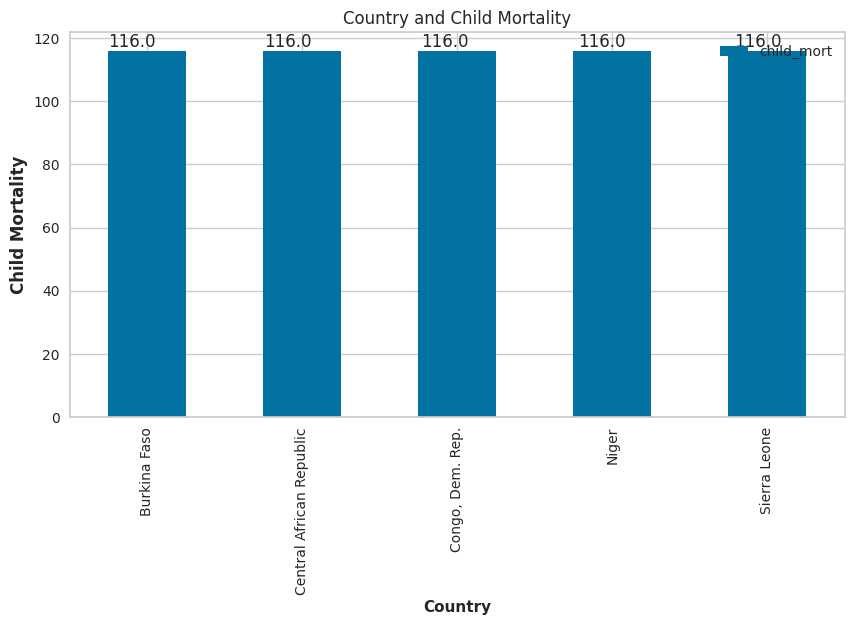

In [89]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.savefig('direneeds_childmort.png')
plt.show()

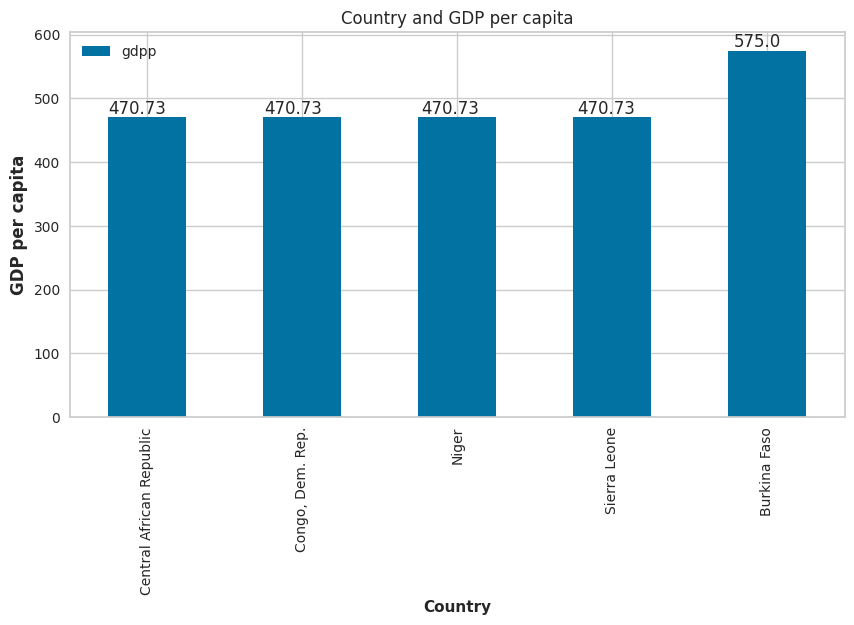

In [90]:
df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.savefig('gdppc_direneeds.png')
plt.show()

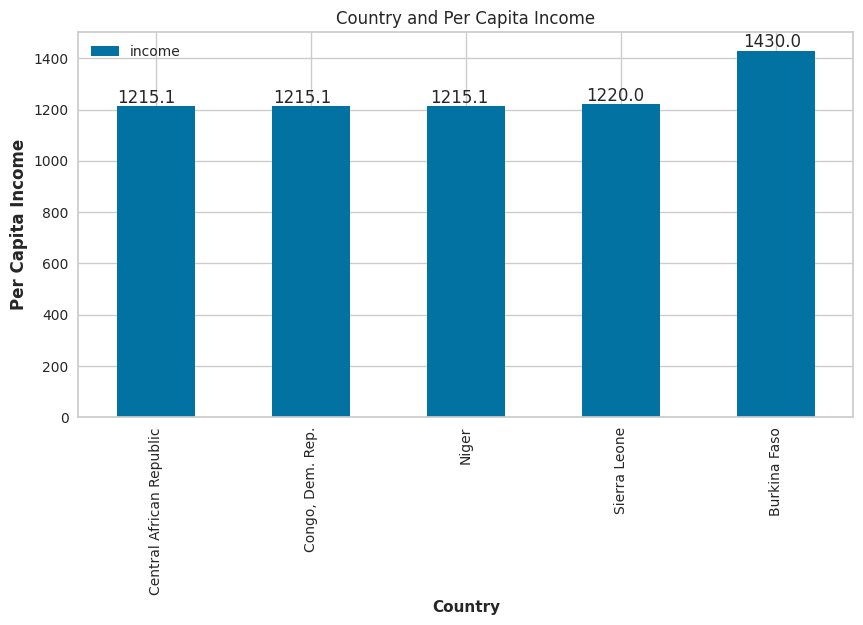

In [91]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.savefig('per_capita_income.png')
plt.show()

Identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters identified the above list of countries which are in dire need of aid.

# Thank you so much for coming to the end of this notebook.😊